# Import and Install Library

In [ ]:
# !pip uninstall -y numpy scipy seaborn pandas
# !pip cache purge

# !pip install \
# numpy==1.26.4 \
# scipy==1.11.4 \
# pandas==2.2.3 \
# seaborn==0.13.2 \
# matplotlib==3.8.4

In [1]:
!pip install -U scikit-learn --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 72.8 MB/s eta 0:00:00


In [2]:
!pip install -U accelerate transformers peft --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 81.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.6/536.6 kB 44.1 MB/s eta 0:00:00


In [1]:
!pip install scikit-learn==1.4.2 --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 138.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
umap-learn 0.5.11 requires scikit-learn>=1.6, but you have scikit-learn 1.4.2 which is incompatible.
hdbscan 0.8.41 requires scikit-learn>=1.6, but you have scikit-learn 1.4.2 which is incompatible.


In [2]:
import numpy as np
import scipy
import sklearn

print(np.__version__)
print(scipy.__version__)
print(sklearn.__version__)

2.0.2
1.16.3
1.4.2


In [3]:
# Cleanup to ensure no residual files remain

!pip uninstall -y transformers accelerate peft bitsandbytes sentence-transformers
!rm -rf /usr/local/lib/python3.11/dist-packages/transformers*
!rm -rf /usr/local/lib/python3.11/dist-packages/peft*
!rm -rf /usr/local/lib/python3.11/dist-packages/accelerate*
!rm -rf /usr/local/lib/python3.11/dist-packages/bitsandbytes*

Found existing installation: transformers 5.0.0
Uninstalling transformers-5.0.0:
  Successfully uninstalled transformers-5.0.0
Found existing installation: accelerate 1.12.0
Uninstalling accelerate-1.12.0:
  Successfully uninstalled accelerate-1.12.0
Found existing installation: peft 0.18.1
Uninstalling peft-0.18.1:
  Successfully uninstalled peft-0.18.1
Found existing installation: sentence-transformers 5.2.0
Uninstalling sentence-transformers-5.2.0:
  Successfully uninstalled sentence-transformers-5.2.0


In [4]:
# Install The Library

!pip install -q \
    "transformers==4.38.2" \
    "peft==0.9.0" \
    "accelerate==0.28.0" \
    "scikit-learn==1.4.2" \
    "datasets==2.18.0" \
    "evaluate" \
    "matplotlib" \
    "seaborn" \
    "sentence-transformers"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.7/130.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 89.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.9/170.9 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 566.1/566.1 kB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 108.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires f

In [5]:
# Import Library
import os
import gc
import time
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    classification_report, confusion_matrix
)

from sklearn.utils.class_weight import compute_class_weight

import transformers
from transformers import (
    AutoModelForSequenceClassification, AutoTokenizer, TrainingArguments,
    Trainer, BitsAndBytesConfig, set_seed, EarlyStoppingCallback
)

from peft import get_peft_model, LoraConfig, PrefixTuningConfig, TaskType
from datasets import Dataset, DatasetDict
import evaluate

if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
else:
    print("CUDA tidak tersedia")

GPU: NVIDIA A100-SXM4-40GB


In [6]:
import tensorflow as tf
print("GPU Available:", tf.config.list_physical_devices('GPU'))

GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [7]:
!nvidia-smi

Tue Jan 27 16:11:23 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   31C    P0             49W /  400W |       5MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

# Function & Configuration

In [45]:
class BaseConfig:
    # --- Basic Data & Model Settings ---
    TARGET_COLUMN = 'Emotion'
    DATASETS = ["raw", "norm"]
    SEEDS = [42, 2023, 7]
    MAX_LENGTH = 64
    BATCH_SIZE = 16
    OUTPUT_DIR = "/content/"

    # --- Method-Specific EPOCHS ---
    # Full FT is sensitive; LoRA needs more time to converge.
    EPOCHS_FULL_FT = 10
    EPOCHS_PEFT = 20
    EPOCHS = 20

    # --- THE LEARNING RATE SEARCH SPACE ---
    # This stores your "fair" comparison ranges
    LR_SPACE = {
        "full_ft": [1e-5, 2e-5, 5e-5],
        "lora":    [1e-4, 2e-4, 5e-4],
        "qlora":   [1e-4, 2e-4, 5e-4]
    }

CONFIG = BaseConfig()

In [9]:
# Unzip the file into the /content directory
!unzip -q /content/split.zip -d /content/

In [7]:
def load_presplit_data(dataset_type, label_column):

    BASE_PATH = "/content/split"

    DATASET_CONFIGS = {
        "raw": {
            "train": os.path.join("raw/train_raw.csv"),
            "val": os.path.join("raw/val_raw.csv"),
            "test": os.path.join("raw/test_raw.csv"),
            "text_column": "text"
        },
        "norm": {
            "train": os.path.join("norm/train_norm.csv"),
            "val": os.path.join("norm/val_norm.csv"),
            "test": os.path.join("norm/test_norm.csv"),
            "text_column": "text"
        }
    }

    config = DATASET_CONFIGS[dataset_type]
    text_column = config["text_column"]

    print(f"\nData: {dataset_type}")
    train_df = pd.read_csv(config["train"])
    val_df = pd.read_csv(config["val"])
    test_df = pd.read_csv(config["test"])

    # Clean missing values
    train_df.dropna(subset=[text_column, label_column], inplace=True)
    val_df.dropna(subset=[text_column, label_column], inplace=True)
    test_df.dropna(subset=[text_column, label_column], inplace=True)

    train_df = train_df.reset_index(drop=True)
    val_df = val_df.reset_index(drop=True)
    test_df = test_df.reset_index(drop=True)

    # Create label mappings from training set
    labels = sorted(train_df[label_column].unique().tolist())
    label2id = {label: i for i, label in enumerate(labels)}
    id2label = {i: label for i, label in enumerate(labels)}

    # Map labels
    train_df['labels'] = train_df[label_column].map(label2id)
    val_df['labels'] = val_df[label_column].map(label2id)
    test_df['labels'] = test_df[label_column].map(label2id)

    print(f"Train: {len(train_df)}, Val: {len(val_df)}, Test: {len(test_df)}")

    return train_df, val_df, test_df, id2label, label2id, text_column

In [8]:
# Convertion to Hugging Face Dataset Function
def convert_to_hf_dataset(train_df, val_df, test_df):
    return DatasetDict({
        'train': Dataset.from_pandas(train_df),
        'validation': Dataset.from_pandas(val_df),
        'test': Dataset.from_pandas(test_df)
    })

In [9]:
class WeightedTrainer(Trainer):
    def __init__(self, *args, class_weights=None, **kwargs):
        super().__init__(*args, **kwargs)
        self.class_weights = class_weights

    # This adds the LR to your table
    def log(self, logs: dict[str, float]) -> None:
        # Get the current LR from the optimizer
        if self.optimizer is not None:
            logs["learning_rate"] = self.optimizer.param_groups[0]["lr"]
        super().log(logs)

    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None, **kwargs):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")
        loss_fct = torch.nn.CrossEntropyLoss(weight=self.class_weights)
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

In [17]:
# Training & Evaluation Transformer (FT, LoRA, QLoRA, Prefix) Function
def train_and_evaluate_transformer(dataset, text_col, model_name, peft_method, id2label, label2id, seed, custom_lr=None):
    print(f"\n----- Training: {model_name} | Method: {peft_method} | Seed: {seed} -----")
    set_seed(seed)

    tokenizer = AutoTokenizer.from_pretrained(model_name)
    if tokenizer.pad_token is None:
        tokenizer.pad_token = tokenizer.eos_token

    def tokenize_function(examples):
        return tokenizer(
            examples[text_col],
            padding="max_length",
            truncation=True,
            max_length=CONFIG.MAX_LENGTH
        )

    tokenized_datasets = dataset.map(tokenize_function, batched=True)

    y_train = tokenized_datasets["train"]["labels"]
    weights = compute_class_weight(
        class_weight='balanced',
        classes=np.unique(y_train),
        y=y_train
    )
    class_weights = torch.tensor(weights, dtype=torch.float).to("cuda")

    bnb_config = None
    device_map = None
    if peft_method == "qlora":
        bnb_config = BitsAndBytesConfig(
            load_in_4bit=True,
            bnb_4bit_quant_type="nf4",
            bnb_4bit_compute_dtype=torch.bfloat16,
            bnb_4bit_use_double_quant=True
        )
        device_map = {"": 0}

    model = AutoModelForSequenceClassification.from_pretrained(
        model_name,
        num_labels=len(id2label),
        id2label=id2label,
        label2id=label2id,
        quantization_config=bnb_config,
        device_map="auto" if peft_method == "qlora" else None
    )

    if peft_method == "qlora":
      from peft import prepare_model_for_kbit_training
      model = prepare_model_for_kbit_training(model)

    if peft_method != "qlora":
        model.to("cuda")
    model.config.pad_token_id = tokenizer.pad_token_id

    # if peft_method == "prefix_tuning":
    #     epochs = 10
    # else:
    #     epochs = CONFIG.EPOCHS

    # if peft_method in ["lora", "qlora"]:
    #     peft_config = LoraConfig(
    #         r=16,
    #         lora_alpha=32,
    #         lora_dropout=0.1,
    #         target_modules=["query", "key", "value", "dense", "intermediate.dense"],
    #         bias="none",
    #         task_type=TaskType.SEQ_CLS
    #     )
    #     model = get_peft_model(model, peft_config)
    #     lr = 2e-4

    # elif peft_method == "full_ft":
    #     lr = 2e-5
    #     epochs = CONFIG.EPOCHS

    # else:
    #     lr = 1e-3

    # 1. Handle Epochs based on Method
    if peft_method == "full_ft":
        epochs = CONFIG.EPOCHS_FULL_FT
    else:
        epochs = CONFIG.EPOCHS_PEFT

    # 2. Handle Learning Rate and PEFT Config
    if peft_method in ["lora", "qlora"]:
        peft_config = LoraConfig(
            r=16,
            lora_alpha=32,
            lora_dropout=0.1,
            target_modules=["query", "key", "value", "dense", "intermediate.dense"],
            bias="none",
            task_type=TaskType.SEQ_CLS
        )
        model = get_peft_model(model, peft_config)
        default_lr = 2e-4
    elif peft_method == "full_ft":
        default_lr = 2e-5
    else:
        default_lr = 1e-3

    # Use custom_lr if provided by the loop, otherwise use default
    lr = custom_lr if custom_lr is not None else default_lr


    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    total_params = sum(p.numel() for p in model.parameters())
    print(f"Trainable params: {trainable_params:,} || Trainable %: {100 * trainable_params / total_params:.4f}")
    lr_str = f"{lr:.0e}"
    output_path = os.path.join(CONFIG.OUTPUT_DIR, f"{model_name.split('/')[-1]}-lr{lr_str}-seed{seed}")

    def compute_metrics_trainer(eval_pred):
        logits, labels = eval_pred
        predictions = np.argmax(logits, axis=-1)
        return {
            "accuracy": accuracy_score(labels, predictions),
            "f1-macro": f1_score(labels, predictions, average="macro")
        }

    training_args = TrainingArguments(
        output_dir=output_path,
        num_train_epochs=epochs,
        overwrite_output_dir=True,
        per_device_train_batch_size=CONFIG.BATCH_SIZE,
        per_device_eval_batch_size=CONFIG.BATCH_SIZE,
        learning_rate=lr,
        weight_decay=0.01,
        evaluation_strategy="epoch",
        save_strategy="epoch",
        load_best_model_at_end=True,
        metric_for_best_model="f1-macro",
        greater_is_better=True,
        fp16=True,
        report_to="none",
        accelerator_config={"dispatch_batches": None},
        resume_from_checkpoint = False
    )

    trainer = WeightedTrainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_datasets["train"],
        eval_dataset=tokenized_datasets["validation"],
        tokenizer=tokenizer,
        compute_metrics=compute_metrics_trainer,
        class_weights=class_weights,
        callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
    )

    torch.cuda.reset_peak_memory_stats()
    start_time = time.time()
    trainer.train(resume_from_checkpoint=False)
    total_train_time = time.time() - start_time
    peak_gpu_memory_mb = torch.cuda.max_memory_allocated() / (1024**2)

    test_predictions = trainer.predict(tokenized_datasets["test"])
    y_true = test_predictions.label_ids
    y_pred = np.argmax(test_predictions.predictions, axis=-1)

    class_names = list(label2id.keys())
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))

    final_results = {
        "accuracy": accuracy_score(y_true, y_pred),
        "f1-macro": f1_score(y_true, y_pred, average="macro"),
        "precision-macro": precision_score(y_true, y_pred, average="macro"),
        "recall-macro": recall_score(y_true, y_pred, average="macro"),
        "total_train_time": total_train_time,
        "peak_gpu_memory_mb": peak_gpu_memory_mb,
        "num_trainable_params": trainable_params
    }

    del model, trainer
    gc.collect()
    torch.cuda.empty_cache()

    return final_results

# A. TF-IDF + Logistic Regression

In [11]:
def train_and_evaluate_baseline(train_df, test_df, text_col, label_col_str, id2label, seed):
    from sklearn.linear_model import LogisticRegression
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.pipeline import Pipeline

    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', LogisticRegression(random_state=seed, max_iter=1000, solver='liblinear'))
    ])

    start_time = time.time()
    pipeline.fit(train_df[text_col], train_df[label_col_str])
    total_train_time = time.time() - start_time

    y_true = test_df[label_col_str]
    y_pred = pipeline.predict(test_df[text_col])

    print("\nClassification Report - TF-IDF + Logistic Regression")
    class_names = list(id2label.values())
    print(classification_report(y_true, y_pred, target_names=class_names))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted'); plt.ylabel('True'); plt.title('Confusion Matrix - TF-IDF + Logistic Regression'); plt.show()

    results = {
        "accuracy": accuracy_score(y_true, y_pred),
        "f1-macro": f1_score(y_true, y_pred, average='macro'),
        "precision-macro": precision_score(y_true, y_pred, average='macro'),
        "recall-macro": recall_score(y_true, y_pred, average='macro'),
        "total_train_time": total_train_time,
        "peak_gpu_memory_mb": 0,
        "num_trainable_params": pipeline.named_steps['clf'].coef_.size,
        "adapter_size_mb": 0
    }
    return results


Data: raw
Train: 4320, Val: 540, Test: 540

Classification Report - TF-IDF + Logistic Regression
              precision    recall  f1-score   support

       Anger       0.52      0.33      0.40        70
        Fear       0.40      0.39      0.40        92
       Happy       0.71      0.89      0.79       177
        Love       0.71      0.40      0.51        81
     Sadness       0.56      0.65      0.60       120

    accuracy                           0.60       540
   macro avg       0.58      0.53      0.54       540
weighted avg       0.60      0.60      0.59       540



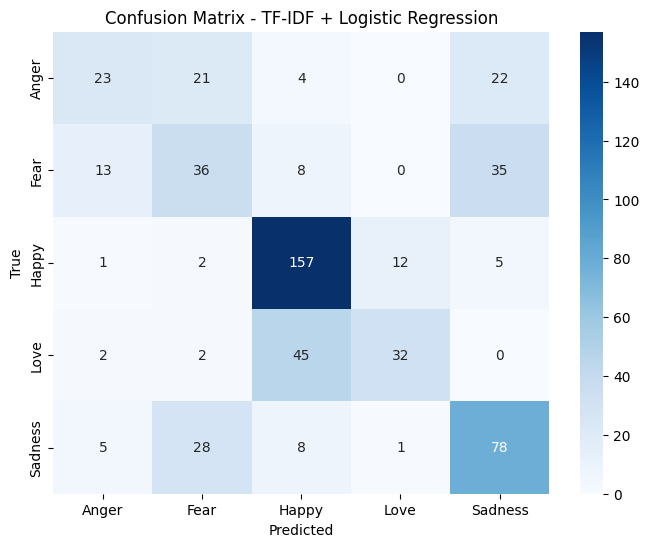


Data: raw
Train: 4320, Val: 540, Test: 540

Classification Report - TF-IDF + Logistic Regression
              precision    recall  f1-score   support

       Anger       0.52      0.33      0.40        70
        Fear       0.40      0.39      0.40        92
       Happy       0.71      0.89      0.79       177
        Love       0.71      0.40      0.51        81
     Sadness       0.56      0.65      0.60       120

    accuracy                           0.60       540
   macro avg       0.58      0.53      0.54       540
weighted avg       0.60      0.60      0.59       540



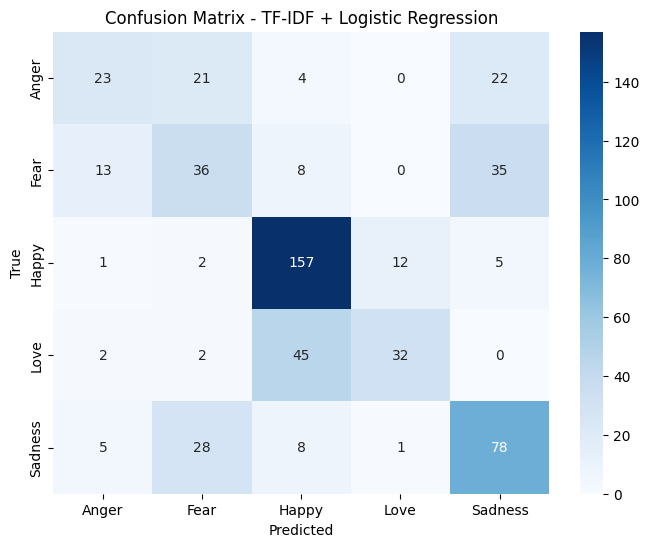


Data: raw
Train: 4320, Val: 540, Test: 540

Classification Report - TF-IDF + Logistic Regression
              precision    recall  f1-score   support

       Anger       0.52      0.33      0.40        70
        Fear       0.40      0.39      0.40        92
       Happy       0.71      0.89      0.79       177
        Love       0.71      0.40      0.51        81
     Sadness       0.56      0.65      0.60       120

    accuracy                           0.60       540
   macro avg       0.58      0.53      0.54       540
weighted avg       0.60      0.60      0.59       540



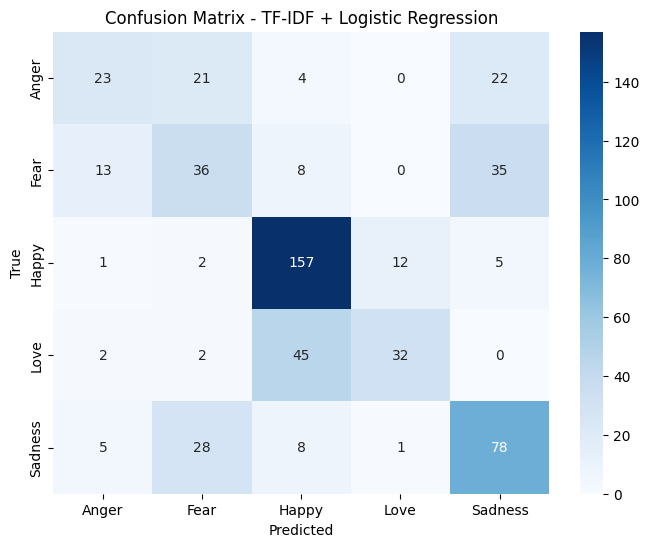


Data: norm
Train: 4314, Val: 539, Test: 540

Classification Report - TF-IDF + Logistic Regression
              precision    recall  f1-score   support

       Anger       0.62      0.30      0.40        70
        Fear       0.44      0.43      0.44        92
       Happy       0.70      0.86      0.77       177
        Love       0.60      0.35      0.44        81
     Sadness       0.55      0.68      0.61       120

    accuracy                           0.60       540
   macro avg       0.58      0.53      0.53       540
weighted avg       0.60      0.60      0.58       540



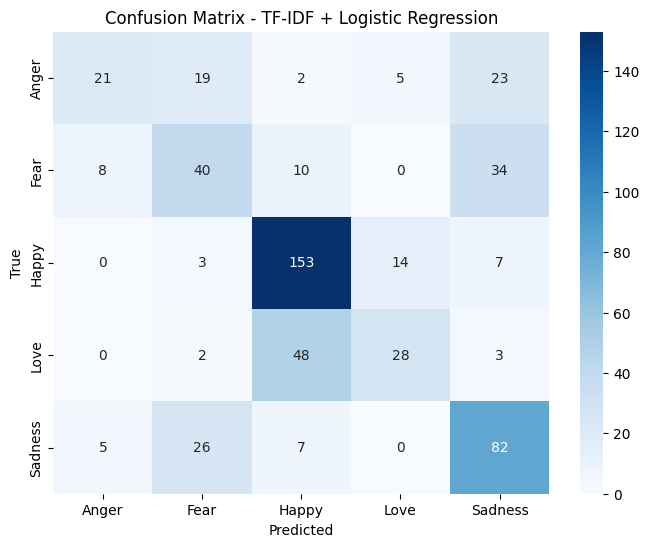


Data: norm
Train: 4314, Val: 539, Test: 540

Classification Report - TF-IDF + Logistic Regression
              precision    recall  f1-score   support

       Anger       0.62      0.30      0.40        70
        Fear       0.44      0.43      0.44        92
       Happy       0.70      0.86      0.77       177
        Love       0.60      0.35      0.44        81
     Sadness       0.55      0.68      0.61       120

    accuracy                           0.60       540
   macro avg       0.58      0.53      0.53       540
weighted avg       0.60      0.60      0.58       540



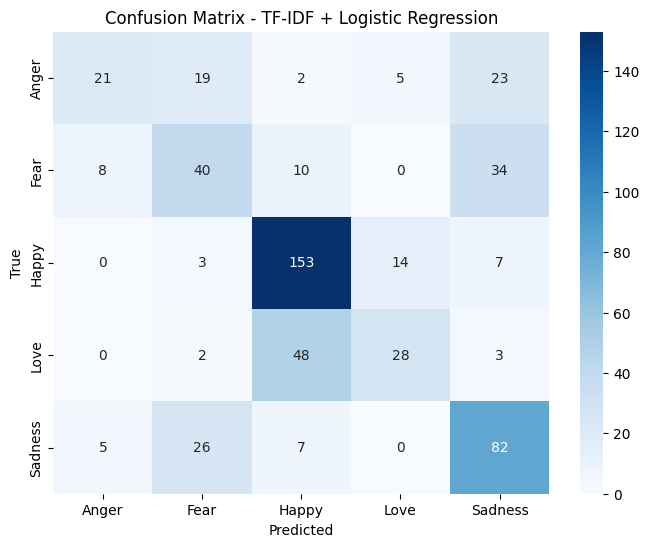


Data: norm
Train: 4314, Val: 539, Test: 540

Classification Report - TF-IDF + Logistic Regression
              precision    recall  f1-score   support

       Anger       0.62      0.30      0.40        70
        Fear       0.44      0.43      0.44        92
       Happy       0.70      0.86      0.77       177
        Love       0.60      0.35      0.44        81
     Sadness       0.55      0.68      0.61       120

    accuracy                           0.60       540
   macro avg       0.58      0.53      0.53       540
weighted avg       0.60      0.60      0.58       540



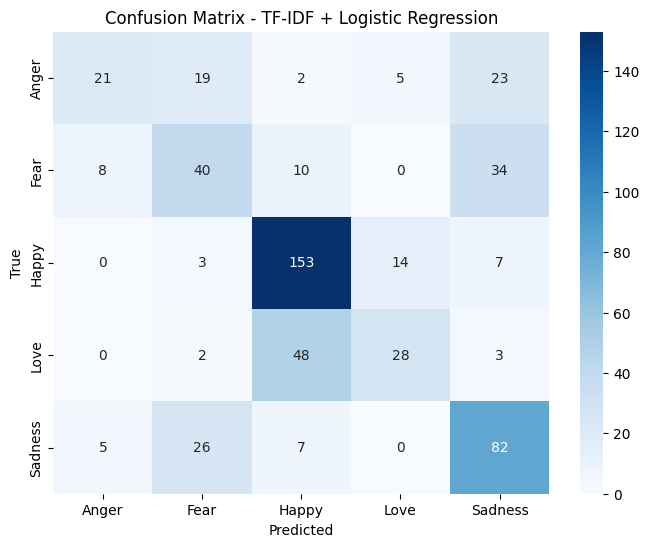

In [12]:
all_results_A = []

for dataset_name in CONFIG.DATASETS:
    for seed in CONFIG.SEEDS:
        try:
            # Load pre-split data
            train_df, val_df, test_df, id2label, label2id, text_col = load_presplit_data(
                dataset_name, CONFIG.TARGET_COLUMN
            )

            # Combine train + val for baseline (no validation needed)
            full_train_df = pd.concat([train_df, val_df])

            results = train_and_evaluate_baseline(
                full_train_df, test_df, text_col, CONFIG.TARGET_COLUMN, id2label, seed
            )

            run_info = {"dataset": dataset_name, "model": "TF-IDF + LogReg", "seed": seed}
            run_info.update(results)
            all_results_A.append(run_info)
        except Exception as e:
            print(f"!!! GAGAL: Dataset {dataset_name}, Seed {seed}. Error: {e}")
            continue

In [13]:
# Final Result for TF-IDF + Logistic Regression
if all_results_A:
    results_df_A = pd.DataFrame(all_results_A)
    print("Final Result for TF-IDF + Logistic Regression")
    display(results_df_A)

Final Result for TF-IDF + Logistic Regression


,dataset,model,seed,accuracy,f1-macro,precision-macro,recall-macro,total_train_time,peak_gpu_memory_mb,num_trainable_params,adapter_size_mb
0,raw,TF-IDF + LogReg,42,0.603704,0.539241,0.580537,0.530389,0.164971,0,41965,0
1,raw,TF-IDF + LogReg,2023,0.603704,0.539241,0.580537,0.530389,0.159623,0,41965,0
2,raw,TF-IDF + LogReg,7,0.603704,0.539241,0.580537,0.530389,0.160210,0,41965,0
3,norm,TF-IDF + LogReg,42,0.600000,0.532271,0.580725,0.525640,0.162533,0,41850,0
4,norm,TF-IDF + LogReg,2023,0.600000,0.532271,0.580725,0.525640,0.164193,0,41850,0
5,norm,TF-IDF + LogReg,7,0.600000,0.532271,0.580725,0.525640,0.159694,0,41850,0


# B. INDOBERTWEET + Full Fine Tuning

In [14]:
all_results_B = []
MODEL_NAME = "indolem/indobertweet-base-uncased"
PEFT_METHOD = "full_ft"

In [18]:
for dataset_name in CONFIG.DATASETS:
    for seed in CONFIG.SEEDS:
        try:
            train_df, val_df, test_df, id2label, label2id, text_col = load_presplit_data(
                dataset_name, CONFIG.TARGET_COLUMN
            )
            hf_datasets = convert_to_hf_dataset(train_df, val_df, test_df)

            results = train_and_evaluate_transformer(
                hf_datasets, text_col, MODEL_NAME, PEFT_METHOD, id2label, label2id, seed
            )

            run_info = {"dataset": dataset_name, "model": "IndoBERTweet Full FT", "seed": seed}
            run_info.update(results)
            all_results_B.append(run_info)
        except Exception as e:
            print(f"!!! GAGAL: Dataset {dataset_name}, Seed {seed}. Error: {e}")
            continue


Data: raw
Train: 4320, Val: 540, Test: 540

----- Training: indolem/indobertweet-base-uncased | Method: full_ft | Seed: 42 -----


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4320 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batc

Trainable params: 110,562,053 || Trainable %: 100.0000


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro,Rate
1,No log,0.736173,0.688889,0.663036,0.000018
2,0.810800,0.758302,0.687037,0.657950,0.000016
3,0.810800,0.853435,0.683333,0.656898,0.000014



Classification Report:
              precision    recall  f1-score   support

       Anger       0.68      0.43      0.53        70
        Fear       0.48      0.73      0.58        92
       Happy       0.88      0.80      0.84       177
        Love       0.66      0.75      0.71        81
     Sadness       0.78      0.67      0.72       120

    accuracy                           0.70       540
   macro avg       0.70      0.68      0.67       540
weighted avg       0.73      0.70      0.71       540


Data: raw
Train: 4320, Val: 540, Test: 540

----- Training: indolem/indobertweet-base-uncased | Method: full_ft | Seed: 2023 -----


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4320 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batc

Trainable params: 110,562,053 || Trainable %: 100.0000


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro,Rate
1,No log,0.734071,0.690741,0.669903,0.000018
2,0.801800,0.773428,0.679630,0.641871,0.000016
3,0.801800,0.808389,0.694444,0.670887,0.000014
4,0.443300,0.894564,0.692593,0.664611,0.000012
5,0.443300,1.104792,0.683333,0.655780,0.000010



Classification Report:
              precision    recall  f1-score   support

       Anger       0.61      0.67      0.64        70
        Fear       0.51      0.57      0.54        92
       Happy       0.88      0.82      0.85       177
        Love       0.67      0.75      0.71        81
     Sadness       0.69      0.61      0.65       120

    accuracy                           0.70       540
   macro avg       0.67      0.68      0.68       540
weighted avg       0.71      0.70      0.70       540


Data: raw
Train: 4320, Val: 540, Test: 540

----- Training: indolem/indobertweet-base-uncased | Method: full_ft | Seed: 7 -----


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4320 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batc

Trainable params: 110,562,053 || Trainable %: 100.0000


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro,Rate
1,No log,0.726885,0.696296,0.670934,0.000018
2,0.794300,0.763657,0.683333,0.656946,0.000016
3,0.794300,0.824526,0.685185,0.660636,0.000014



Classification Report:
              precision    recall  f1-score   support

       Anger       0.64      0.50      0.56        70
        Fear       0.52      0.60      0.56        92
       Happy       0.87      0.84      0.85       177
        Love       0.69      0.72      0.70        81
     Sadness       0.70      0.72      0.71       120

    accuracy                           0.71       540
   macro avg       0.68      0.68      0.68       540
weighted avg       0.71      0.71      0.71       540


Data: norm
Train: 4314, Val: 539, Test: 540

----- Training: indolem/indobertweet-base-uncased | Method: full_ft | Seed: 42 -----


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4314 [00:00<?, ? examples/s]

Map:   0%|          | 0/539 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batc

Trainable params: 110,562,053 || Trainable %: 100.0000


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro,Rate
1,No log,0.727372,0.680891,0.651454,0.000018
2,0.816200,0.697224,0.725417,0.693459,0.000016
3,0.816200,0.769323,0.727273,0.694696,0.000014
4,0.450400,0.897532,0.714286,0.679184,0.000012
5,0.450400,1.072151,0.712430,0.677350,0.000010


Checkpoint destination directory /content/indobertweet-base-uncased-lr2e-05-seed42/checkpoint-270 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Checkpoint destination directory /content/indobertweet-base-uncased-lr2e-05-seed42/checkpoint-540 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Checkpoint destination directory /content/indobertweet-base-uncased-lr2e-05-seed42/checkpoint-810 already exists and is non-empty. Saving will proceed but saved results may be invalid.



Classification Report:
              precision    recall  f1-score   support

       Anger       0.61      0.66      0.63        70
        Fear       0.53      0.45      0.48        92
       Happy       0.86      0.82      0.84       177
        Love       0.71      0.79      0.75        81
     Sadness       0.67      0.72      0.69       120

    accuracy                           0.71       540
   macro avg       0.68      0.69      0.68       540
weighted avg       0.71      0.71      0.71       540


Data: norm
Train: 4314, Val: 539, Test: 540

----- Training: indolem/indobertweet-base-uncased | Method: full_ft | Seed: 2023 -----


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4314 [00:00<?, ? examples/s]

Map:   0%|          | 0/539 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batc

Trainable params: 110,562,053 || Trainable %: 100.0000


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro,Rate
1,No log,0.709829,0.701299,0.672339,0.000018
2,0.806500,0.692451,0.730983,0.700476,0.000016
3,0.806500,0.761567,0.732839,0.700841,0.000014
4,0.443400,0.854772,0.727273,0.700587,0.000012
5,0.443400,1.053886,0.725417,0.689358,0.000010


Checkpoint destination directory /content/indobertweet-base-uncased-lr2e-05-seed2023/checkpoint-270 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Checkpoint destination directory /content/indobertweet-base-uncased-lr2e-05-seed2023/checkpoint-540 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Checkpoint destination directory /content/indobertweet-base-uncased-lr2e-05-seed2023/checkpoint-810 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Checkpoint destination directory /content/indobertweet-base-uncased-lr2e-05-seed2023/checkpoint-1080 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Checkpoint destination directory /content/indobertweet-base-uncased-lr2e-05-seed2023/checkpoint-1350 already exists and is non-empty. Saving will proceed but saved results may be invalid.



Classification Report:
              precision    recall  f1-score   support

       Anger       0.64      0.66      0.65        70
        Fear       0.56      0.41      0.47        92
       Happy       0.85      0.80      0.82       177
        Love       0.68      0.80      0.73        81
     Sadness       0.63      0.72      0.67       120

    accuracy                           0.70       540
   macro avg       0.67      0.68      0.67       540
weighted avg       0.70      0.70      0.69       540


Data: norm
Train: 4314, Val: 539, Test: 540

----- Training: indolem/indobertweet-base-uncased | Method: full_ft | Seed: 7 -----


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4314 [00:00<?, ? examples/s]

Map:   0%|          | 0/539 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batc

Trainable params: 110,562,053 || Trainable %: 100.0000


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro,Rate
1,No log,0.707980,0.693878,0.667902,0.000018
2,0.790900,0.709195,0.721707,0.691320,0.000016
3,0.790900,0.786192,0.734694,0.704910,0.000014
4,0.422500,0.900084,0.714286,0.681815,0.000012
5,0.422500,1.089617,0.721707,0.689822,0.000010


Checkpoint destination directory /content/indobertweet-base-uncased-lr2e-05-seed7/checkpoint-270 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Checkpoint destination directory /content/indobertweet-base-uncased-lr2e-05-seed7/checkpoint-540 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Checkpoint destination directory /content/indobertweet-base-uncased-lr2e-05-seed7/checkpoint-810 already exists and is non-empty. Saving will proceed but saved results may be invalid.



Classification Report:
              precision    recall  f1-score   support

       Anger       0.64      0.67      0.65        70
        Fear       0.54      0.49      0.51        92
       Happy       0.84      0.80      0.82       177
        Love       0.69      0.75      0.72        81
     Sadness       0.66      0.68      0.67       120

    accuracy                           0.70       540
   macro avg       0.67      0.68      0.67       540
weighted avg       0.70      0.70      0.70       540



In [19]:
if all_results_B:
    results_df_B = pd.DataFrame(all_results_B)
    print("Final Result for INDOBERTWEET Full Fine Tuning")
    display(results_df_B)

Final Result for INDOBERTWEET Full Fine Tuning


,dataset,model,seed,accuracy,f1-macro,precision-macro,recall-macro,total_train_time,peak_gpu_memory_mb,num_trainable_params
0,raw,IndoBERTweet Full FT,42,0.703704,0.673366,0.696424,0.675769,66.675473,2164.25293,110562053
1,raw,IndoBERTweet Full FT,2023,0.700000,0.676318,0.672608,0.683455,104.934280,2161.50293,110562053
2,raw,IndoBERTweet Full FT,7,0.709259,0.676437,0.682429,0.675007,63.331611,2161.50293,110562053
3,norm,IndoBERTweet Full FT,42,0.709259,0.680571,0.677173,0.686889,98.640050,2161.50293,110562053
4,norm,IndoBERTweet Full FT,2023,0.698148,0.670483,0.670477,0.678316,93.381342,2161.50293,110562053
5,norm,IndoBERTweet Full FT,7,0.698148,0.674946,0.671554,0.679848,99.339865,2161.50293,110562053


# C. INDOBERTWEET + LORA

In [20]:
all_results_C = []
MODEL_NAME = "indolem/indobertweet-base-uncased"
PEFT_METHOD = "lora"

In [21]:
for dataset_name in CONFIG.DATASETS:
    for seed in CONFIG.SEEDS:
        try:
            train_df, val_df, test_df, id2label, label2id, text_col = load_presplit_data(
                dataset_name, CONFIG.TARGET_COLUMN
            )
            hf_datasets = convert_to_hf_dataset(train_df, val_df, test_df)

            results = train_and_evaluate_transformer(
                hf_datasets, text_col, MODEL_NAME, PEFT_METHOD, id2label, label2id, seed
            )

            run_info = {"dataset": dataset_name, "model": "IndoBERTweet LoRA", "seed": seed}
            run_info.update(results)
            all_results_C.append(run_info)
        except Exception as e:
            print(f"!!! GAGAL: Dataset {dataset_name}, Seed {seed}. Error: {e}")
            continue


Data: raw
Train: 4320, Val: 540, Test: 540

----- Training: indolem/indobertweet-base-uncased | Method: lora | Seed: 42 -----


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4320 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Trainable params: 2,682,629 || Trainable %: 2.3689


/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:463: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro,Rate
1,No log,0.786761,0.670370,0.649692,0.000190
2,0.888000,0.755774,0.681481,0.658586,0.000180
3,0.888000,0.732142,0.703704,0.685272,0.000170
4,0.608800,0.753793,0.675926,0.656304,0.000160
5,0.608800,0.876825,0.674074,0.652759,0.000150


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in ver


Classification Report:
              precision    recall  f1-score   support

       Anger       0.64      0.66      0.65        70
        Fear       0.52      0.63      0.57        92
       Happy       0.88      0.80      0.83       177
        Love       0.66      0.77      0.71        81
     Sadness       0.74      0.62      0.68       120

    accuracy                           0.71       540
   macro avg       0.69      0.69      0.69       540
weighted avg       0.72      0.71      0.71       540


Data: raw
Train: 4320, Val: 540, Test: 540

----- Training: indolem/indobertweet-base-uncased | Method: lora | Seed: 2023 -----


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4320 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Trainable params: 2,682,629 || Trainable %: 2.3689


/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:463: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro,Rate
1,No log,0.733047,0.683333,0.660835,0.000190
2,0.831000,0.722324,0.679630,0.657928,0.000180
3,0.831000,0.780803,0.694444,0.669139,0.000170
4,0.548600,0.803682,0.690741,0.670755,0.000160
5,0.548600,0.940333,0.694444,0.669083,0.000150
6,0.387700,1.203717,0.688889,0.658473,0.000140


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in ver


Classification Report:
              precision    recall  f1-score   support

       Anger       0.59      0.63      0.61        70
        Fear       0.52      0.62      0.56        92
       Happy       0.89      0.81      0.85       177
        Love       0.67      0.75      0.71        81
     Sadness       0.69      0.59      0.64       120

    accuracy                           0.70       540
   macro avg       0.67      0.68      0.67       540
weighted avg       0.71      0.70      0.70       540


Data: raw
Train: 4320, Val: 540, Test: 540

----- Training: indolem/indobertweet-base-uncased | Method: lora | Seed: 7 -----


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4320 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Trainable params: 2,682,629 || Trainable %: 2.3689


/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:463: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro,Rate
1,No log,0.742550,0.687037,0.662974,0.000190
2,0.833200,0.732509,0.679630,0.653389,0.000180
3,0.833200,0.772222,0.668519,0.647096,0.000170


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(



Classification Report:
              precision    recall  f1-score   support

       Anger       0.72      0.41      0.53        70
        Fear       0.47      0.68      0.56        92
       Happy       0.89      0.80      0.85       177
        Love       0.68      0.78      0.72        81
     Sadness       0.70      0.67      0.68       120

    accuracy                           0.70       540
   macro avg       0.69      0.67      0.67       540
weighted avg       0.72      0.70      0.70       540


Data: norm
Train: 4314, Val: 539, Test: 540

----- Training: indolem/indobertweet-base-uncased | Method: lora | Seed: 42 -----


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4314 [00:00<?, ? examples/s]

Map:   0%|          | 0/539 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Trainable params: 2,682,629 || Trainable %: 2.3689


/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:463: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro,Rate
1,No log,0.716426,0.684601,0.658226,0.000190
2,0.842200,0.681162,0.730983,0.698886,0.000180
3,0.842200,0.704551,0.760668,0.728451,0.000170
4,0.568500,0.718013,0.742115,0.710042,0.000160
5,0.568500,0.876112,0.721707,0.690198,0.000150


Checkpoint destination directory /content/indobertweet-base-uncased-lr2e-04-seed42/checkpoint-270 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Checkpoint destination directory /content/indobertweet-base-uncased-lr2e-04-seed42/checkpoint-540 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Checkpoint destination directory /content/indobertweet-base-unca


Classification Report:
              precision    recall  f1-score   support

       Anger       0.58      0.59      0.58        70
        Fear       0.55      0.50      0.53        92
       Happy       0.84      0.81      0.82       177
        Love       0.68      0.72      0.70        81
     Sadness       0.66      0.72      0.69       120

    accuracy                           0.69       540
   macro avg       0.66      0.67      0.66       540
weighted avg       0.69      0.69      0.69       540


Data: norm
Train: 4314, Val: 539, Test: 540

----- Training: indolem/indobertweet-base-uncased | Method: lora | Seed: 2023 -----


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4314 [00:00<?, ? examples/s]

Map:   0%|          | 0/539 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Trainable params: 2,682,629 || Trainable %: 2.3689


/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:463: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro,Rate
1,No log,0.728522,0.671614,0.649626,0.000190
2,0.831100,0.677162,0.717996,0.686600,0.000180
3,0.831100,0.700551,0.730983,0.703476,0.000170
4,0.553600,0.722489,0.727273,0.694876,0.000160
5,0.553600,0.799954,0.743970,0.717209,0.000150
6,0.394900,1.038683,0.708720,0.677051,0.000140
7,0.394900,1.127346,0.727273,0.696209,0.000130


Checkpoint destination directory /content/indobertweet-base-uncased-lr2e-04-seed2023/checkpoint-270 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Checkpoint destination directory /content/indobertweet-base-uncased-lr2e-04-seed2023/checkpoint-540 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Checkpoint destination directory /content/indobertweet-base-


Classification Report:
              precision    recall  f1-score   support

       Anger       0.58      0.69      0.63        70
        Fear       0.51      0.51      0.51        92
       Happy       0.84      0.80      0.82       177
        Love       0.68      0.78      0.73        81
     Sadness       0.70      0.61      0.65       120

    accuracy                           0.69       540
   macro avg       0.66      0.68      0.67       540
weighted avg       0.70      0.69      0.69       540


Data: norm
Train: 4314, Val: 539, Test: 540

----- Training: indolem/indobertweet-base-uncased | Method: lora | Seed: 7 -----


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4314 [00:00<?, ? examples/s]

Map:   0%|          | 0/539 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Trainable params: 2,682,629 || Trainable %: 2.3689


/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:463: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro,Rate
1,No log,0.729731,0.693878,0.670595,0.000190
2,0.824600,0.715271,0.732839,0.702204,0.000180
3,0.824600,0.725790,0.723562,0.702870,0.000170
4,0.553200,0.826042,0.695733,0.664976,0.000160
5,0.553200,0.936762,0.697588,0.665972,0.000150


Checkpoint destination directory /content/indobertweet-base-uncased-lr2e-04-seed7/checkpoint-270 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Checkpoint destination directory /content/indobertweet-base-uncased-lr2e-04-seed7/checkpoint-540 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Checkpoint destination directory /content/indobertweet-base-uncase


Classification Report:
              precision    recall  f1-score   support

       Anger       0.66      0.63      0.64        70
        Fear       0.58      0.52      0.55        92
       Happy       0.86      0.75      0.80       177
        Love       0.63      0.81      0.71        81
     Sadness       0.67      0.73      0.70       120

    accuracy                           0.70       540
   macro avg       0.68      0.69      0.68       540
weighted avg       0.71      0.70      0.70       540



In [22]:
if all_results_C:
    results_df_C = pd.DataFrame(all_results_C)
    print("Final Result for INDOBERTWEET + LORA")
    display(results_df_C)

Final Result for INDOBERTWEET + LORA


,dataset,model,seed,accuracy,f1-macro,precision-macro,recall-macro,total_train_time,peak_gpu_memory_mb,num_trainable_params
0,raw,IndoBERTweet LoRA,42,0.707407,0.687628,0.686934,0.694924,140.697739,1229.695801,2682629
1,raw,IndoBERTweet LoRA,2023,0.698148,0.674220,0.672263,0.681290,168.753740,1229.695801,2682629
2,raw,IndoBERTweet LoRA,7,0.698148,0.667586,0.693481,0.669155,84.699042,1229.695801,2682629
3,norm,IndoBERTweet LoRA,42,0.692593,0.663182,0.662366,0.665268,140.332481,1229.695801,2682629
4,norm,IndoBERTweet LoRA,2023,0.690741,0.667848,0.663225,0.676991,197.574544,1229.695801,2682629
5,norm,IndoBERTweet LoRA,7,0.701852,0.681364,0.679893,0.689974,141.038484,1229.695801,2682629


# D. INDOBERTWEET + QLORA

In [23]:
all_results_E = []
MODEL_NAME = "indolem/indobertweet-base-uncased"
PEFT_METHOD = "qlora"

In [24]:
!pip install -U bitsandbytes accelerate --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 MB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.9/380.9 kB 34.0 MB/s eta 0:00:00


In [33]:
for dataset_name in CONFIG.DATASETS:  # ← CHANGED HERE
    for seed in CONFIG.SEEDS:
        try:
            train_df, val_df, test_df, id2label, label2id, text_col = load_presplit_data(  # ← CHANGED HERE (6 values)
                dataset_name, CONFIG.TARGET_COLUMN  # ← CHANGED HERE (2 args only)
            )
            hf_datasets = convert_to_hf_dataset(train_df, val_df, test_df)

            results = train_and_evaluate_transformer(
                hf_datasets, text_col, MODEL_NAME, PEFT_METHOD, id2label, label2id, seed
            )

            run_info = {"dataset": dataset_name, "model": "IndoBERTweet QLoRA", "seed": seed}
            run_info.update(results)
            all_results_E.append(run_info)
        except Exception as e:
            print(f"!!! GAGAL: Dataset {dataset_name}, Seed {seed}. Error: {e}")
            continue


Data: raw
Train: 4320, Val: 540, Test: 540

----- Training: indolem/indobertweet-base-uncased | Method: prefix_tuning | Seed: 42 -----


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4320 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batc

Trainable params: 110,562,053 || Trainable %: 100.0000


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro,Rate
1,No log,1.627610,0.170370,0.058228,0.000951
2,1.733100,1.662906,0.170370,0.058228,0.000901
3,1.733100,1.661813,0.129630,0.045902,0.000851



Classification Report:
              precision    recall  f1-score   support

       Anger       0.00      0.00      0.00        70
        Fear       0.17      1.00      0.29        92
       Happy       0.00      0.00      0.00       177
        Love       0.00      0.00      0.00        81
     Sadness       0.00      0.00      0.00       120

    accuracy                           0.17       540
   macro avg       0.03      0.20      0.06       540
weighted avg       0.03      0.17      0.05       540



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m


Data: raw
Train: 4320, Val: 540, Test: 540

----- Training: indolem/indobertweet-base-uncased | Method: prefix_tuning | Seed: 2023 -----


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4320 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batc

Trainable params: 110,562,053 || Trainable %: 100.0000


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro,Rate
1,No log,1.623615,0.170370,0.058228,0.000951
2,1.721700,1.668796,0.170370,0.058228,0.000901
3,1.721700,1.692722,0.129630,0.045902,0.000851



Classification Report:
              precision    recall  f1-score   support

       Anger       0.00      0.00      0.00        70
        Fear       0.17      1.00      0.29        92
       Happy       0.00      0.00      0.00       177
        Love       0.00      0.00      0.00        81
     Sadness       0.00      0.00      0.00       120

    accuracy                           0.17       540
   macro avg       0.03      0.20      0.06       540
weighted avg       0.03      0.17      0.05       540



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m


Data: raw
Train: 4320, Val: 540, Test: 540

----- Training: indolem/indobertweet-base-uncased | Method: prefix_tuning | Seed: 7 -----


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4320 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batc

Trainable params: 110,562,053 || Trainable %: 100.0000


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro,Rate
1,No log,1.622571,0.170370,0.058228,0.000950
2,1.735600,1.668706,0.170370,0.058228,0.000900
3,1.735600,1.664042,0.129630,0.045902,0.000850



Classification Report:
              precision    recall  f1-score   support

       Anger       0.00      0.00      0.00        70
        Fear       0.17      1.00      0.29        92
       Happy       0.00      0.00      0.00       177
        Love       0.00      0.00      0.00        81
     Sadness       0.00      0.00      0.00       120

    accuracy                           0.17       540
   macro avg       0.03      0.20      0.06       540
weighted avg       0.03      0.17      0.05       540



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m


Data: norm
Train: 4314, Val: 539, Test: 540

----- Training: indolem/indobertweet-base-uncased | Method: prefix_tuning | Seed: 42 -----


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4314 [00:00<?, ? examples/s]

Map:   0%|          | 0/539 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batc

Trainable params: 110,562,053 || Trainable %: 100.0000


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro,Rate
1,No log,1.662853,0.328386,0.098883,0.000950
2,1.731900,1.751852,0.170686,0.058320,0.000900
3,1.731900,1.659479,0.150278,0.052258,0.000850


Checkpoint destination directory /content/indobertweet-base-uncased-lr1e-03-seed42/checkpoint-270 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Checkpoint destination directory /content/indobertweet-base-uncased-lr1e-03-seed42/checkpoint-540 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Checkpoint destination directory /content/indobertweet-base-uncased-lr1e-03-seed42/checkpoint-810 already exists and is non-empty. Saving will proceed but saved results may be invalid.



Classification Report:
              precision    recall  f1-score   support

       Anger       0.00      0.00      0.00        70
        Fear       0.00      0.00      0.00        92
       Happy       0.33      1.00      0.49       177
        Love       0.00      0.00      0.00        81
     Sadness       0.00      0.00      0.00       120

    accuracy                           0.33       540
   macro avg       0.07      0.20      0.10       540
weighted avg       0.11      0.33      0.16       540



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m


Data: norm
Train: 4314, Val: 539, Test: 540

----- Training: indolem/indobertweet-base-uncased | Method: prefix_tuning | Seed: 2023 -----


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4314 [00:00<?, ? examples/s]

Map:   0%|          | 0/539 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batc

Trainable params: 110,562,053 || Trainable %: 100.0000


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro,Rate
1,No log,1.668390,0.328386,0.098883,0.000950
2,1.719700,1.713884,0.170686,0.058320,0.000900
3,1.719700,1.661650,0.150278,0.052258,0.000850


Checkpoint destination directory /content/indobertweet-base-uncased-lr1e-03-seed2023/checkpoint-270 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Checkpoint destination directory /content/indobertweet-base-uncased-lr1e-03-seed2023/checkpoint-540 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Checkpoint destination directory /content/indobertweet-base-uncased-lr1e-03-seed2023/checkpoint-810 already exists and is non-empty. Saving will proceed but saved results may be invalid.



Classification Report:
              precision    recall  f1-score   support

       Anger       0.00      0.00      0.00        70
        Fear       0.00      0.00      0.00        92
       Happy       0.33      1.00      0.49       177
        Love       0.00      0.00      0.00        81
     Sadness       0.00      0.00      0.00       120

    accuracy                           0.33       540
   macro avg       0.07      0.20      0.10       540
weighted avg       0.11      0.33      0.16       540



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m


Data: norm
Train: 4314, Val: 539, Test: 540

----- Training: indolem/indobertweet-base-uncased | Method: prefix_tuning | Seed: 7 -----


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4314 [00:00<?, ? examples/s]

Map:   0%|          | 0/539 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batc

Trainable params: 110,562,053 || Trainable %: 100.0000


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro,Rate
1,No log,1.676847,0.328386,0.098883,0.000951
2,1.730500,1.742565,0.170686,0.058320,0.000901
3,1.730500,1.644723,0.150278,0.052258,0.000851


Checkpoint destination directory /content/indobertweet-base-uncased-lr1e-03-seed7/checkpoint-270 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Checkpoint destination directory /content/indobertweet-base-uncased-lr1e-03-seed7/checkpoint-540 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Checkpoint destination directory /content/indobertweet-base-uncased-lr1e-03-seed7/checkpoint-810 already exists and is non-empty. Saving will proceed but saved results may be invalid.



Classification Report:
              precision    recall  f1-score   support

       Anger       0.00      0.00      0.00        70
        Fear       0.00      0.00      0.00        92
       Happy       0.33      1.00      0.49       177
        Love       0.00      0.00      0.00        81
     Sadness       0.00      0.00      0.00       120

    accuracy                           0.33       540
   macro avg       0.07      0.20      0.10       540
weighted avg       0.11      0.33      0.16       540



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

In [34]:
if all_results_E:
    results_df_E = pd.DataFrame(all_results_E)
    print("Final Result for INDOBERTWEET + QLORA")
    display(results_df_E)

Final Result for INDOBERTWEET + QLORA


,dataset,model,seed,accuracy,f1-macro,precision-macro,recall-macro,total_train_time,peak_gpu_memory_mb,num_trainable_params
0,raw,IndoBERTweet QLoRA,42,0.170370,0.058228,0.034074,0.2,63.559071,2592.262695,110562053
1,raw,IndoBERTweet QLoRA,2023,0.170370,0.058228,0.034074,0.2,63.343897,2592.262695,110562053
2,raw,IndoBERTweet QLoRA,7,0.170370,0.058228,0.034074,0.2,62.346337,2592.262695,110562053
3,norm,IndoBERTweet QLoRA,42,0.327778,0.098745,0.065556,0.2,54.926969,2592.262695,110562053
4,norm,IndoBERTweet QLoRA,2023,0.327778,0.098745,0.065556,0.2,55.040412,2592.262695,110562053
5,norm,IndoBERTweet QLoRA,7,0.327778,0.098745,0.065556,0.2,55.113884,2592.262695,110562053


# E. INDOBERTWEET + Prefix Tuning

In [38]:
from peft import PrefixTuningConfig

all_results_F = []
MODEL_NAME = "indolem/indobertweet-base-uncased"
PEFT_METHOD = "prefix_tuning"

In [47]:
for dataset_name in CONFIG.DATASETS:
    for seed in CONFIG.SEEDS:
        try:
            train_df, val_df, test_df, id2label, label2id, text_col = load_presplit_data(
                dataset_name, CONFIG.TARGET_COLUMN
            )
            hf_datasets = convert_to_hf_dataset(train_df, val_df, test_df)

            set_seed(seed)
            tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
            if tokenizer.pad_token is None:
                tokenizer.pad_token = tokenizer.eos_token

            def tokenize_function(examples):
                return tokenizer(examples[text_col], padding="max_length", truncation=True, max_length=CONFIG.MAX_LENGTH)
            tokenized_datasets = hf_datasets.map(tokenize_function, batched=True)

            model = AutoModelForSequenceClassification.from_pretrained(
                MODEL_NAME, num_labels=len(id2label), id2label=id2label, label2id=label2id
            )
            model.to("cuda")
            model.config.pad_token_id = tokenizer.pad_token_id

            prefix_config = PrefixTuningConfig(
                task_type=TaskType.SEQ_CLS,
                num_virtual_tokens=50,
                prefix_projection=False
            )
            model = get_peft_model(model, prefix_config)
            model.print_trainable_parameters()

            trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

            output_path = os.path.join(CONFIG.OUTPUT_DIR, f"{MODEL_NAME.split('/')[-1]}-prefix-{seed}")

            def compute_metrics_trainer(eval_pred):
                logits, labels = eval_pred
                predictions = np.argmax(logits, axis=-1)
                return {"accuracy": accuracy_score(labels, predictions), "f1-macro": f1_score(labels, predictions, average="macro")}

            training_args = TrainingArguments(
                output_dir=output_path, num_train_epochs=CONFIG.EPOCHS,
                per_device_train_batch_size=CONFIG.BATCH_SIZE, per_device_eval_batch_size=CONFIG.BATCH_SIZE,
                learning_rate=1e-4, weight_decay=0.01, evaluation_strategy="epoch", save_strategy="epoch",
                load_best_model_at_end=True, metric_for_best_model="f1-macro", greater_is_better=True,
                fp16=True, report_to="none"
            )
            trainer = Trainer(
                model=model, args=training_args, train_dataset=tokenized_datasets["train"],
                eval_dataset=tokenized_datasets["validation"], tokenizer=tokenizer,
                compute_metrics=compute_metrics_trainer,
                callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
            )

            torch.cuda.reset_peak_memory_stats()
            start_time = time.time()
            trainer.train()
            total_train_time = time.time() - start_time
            peak_gpu_memory_mb = torch.cuda.max_memory_allocated() / (1024**2)

            test_predictions = trainer.predict(tokenized_datasets["test"])
            y_true = test_predictions.label_ids
            y_pred = np.argmax(test_predictions.predictions, axis=-1)

            print("\nClassification Report")
            class_names = list(label2id.keys())
            print(classification_report(y_true, y_pred, target_names=class_names))

            adapter_path = os.path.join(output_path, "final_adapter")
            model.save_pretrained(adapter_path)
            adapter_size_mb = sum(os.path.getsize(os.path.join(adapter_path, f)) for f in os.listdir(adapter_path)) / (1024**2)

            results = {
                "accuracy": accuracy_score(y_true, y_pred),
                "f1-macro": f1_score(y_true, y_pred, average="macro"),
                "precision-macro": precision_score(y_true, y_pred, average="macro"),
                "recall-macro": recall_score(y_true, y_pred, average="macro"),
                "total_train_time": total_train_time,
                "peak_gpu_memory_mb": peak_gpu_memory_mb,
                "num_trainable_params": trainable_params,
                "adapter_size_mb": adapter_size_mb
            }

            run_info = {"dataset": dataset_name, "model": "IndoBERTweet Prefix", "seed": seed}
            run_info.update(results)
            all_results_F.append(run_info)

            del model, trainer
            gc.collect()
            torch.cuda.empty_cache()

        except Exception as e:
            print(f"!!! GAGAL: Dataset {dataset_name}, Seed {seed}. Error: {e}")
            continue


Data: raw
Train: 4320, Val: 540, Test: 540


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4320 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  AutocastKwargs: "autocast_handler",
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:463: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScal

trainable params: 925,445 || all params: 111,487,498 || trainable%: 0.8300885898434998


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro
1,No log,1.463017,0.403704,0.193596
2,1.496500,1.361822,0.455556,0.262301
3,1.496500,1.262266,0.501852,0.322417
4,1.340400,1.160076,0.522222,0.356328
5,1.340400,1.082196,0.540741,0.395930
6,1.168100,1.028239,0.557407,0.430435
7,1.168100,0.991943,0.570370,0.455986
8,1.053400,0.967609,0.568519,0.459711
9,1.053400,0.950119,0.564815,0.458684
10,0.980300,0.939785,0.575926,0.468823


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in ver


Classification Report
              precision    recall  f1-score   support

       Anger       0.61      0.20      0.30        70
        Fear       0.50      0.35      0.41        92
       Happy       0.74      0.89      0.81       177
        Love       0.71      0.37      0.49        81
     Sadness       0.51      0.84      0.64       120

    accuracy                           0.62       540
   macro avg       0.61      0.53      0.53       540
weighted avg       0.63      0.62      0.59       540



/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(



Data: raw
Train: 4320, Val: 540, Test: 540


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4320 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  AutocastKwargs: "autocast_handler",
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:463: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScal

trainable params: 925,445 || all params: 111,487,498 || trainable%: 0.8300885898434998


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro
1,No log,1.428946,0.412963,0.204578
2,1.472500,1.294101,0.472222,0.291496
3,1.472500,1.153084,0.535185,0.383088
4,1.240400,1.039979,0.555556,0.427223
5,1.240400,0.980366,0.557407,0.437555
6,1.032400,0.948149,0.570370,0.462413
7,1.032400,0.927645,0.577778,0.481038
8,0.958600,0.912679,0.581481,0.492350
9,0.958600,0.902645,0.590741,0.509376
10,0.899700,0.894090,0.590741,0.504310


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in ver


Classification Report
              precision    recall  f1-score   support

       Anger       0.69      0.26      0.38        70
        Fear       0.51      0.39      0.44        92
       Happy       0.74      0.89      0.81       177
        Love       0.80      0.43      0.56        81
     Sadness       0.51      0.79      0.62       120

    accuracy                           0.63       540
   macro avg       0.65      0.55      0.56       540
weighted avg       0.65      0.63      0.61       540



/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(



Data: raw
Train: 4320, Val: 540, Test: 540


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4320 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  AutocastKwargs: "autocast_handler",
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:463: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScal

trainable params: 925,445 || all params: 111,487,498 || trainable%: 0.8300885898434998


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro
1,No log,1.448913,0.411111,0.199043
2,1.488300,1.363958,0.446296,0.278568
3,1.488300,1.283075,0.475926,0.329123
4,1.346500,1.204427,0.522222,0.370677
5,1.346500,1.136286,0.537037,0.398028
6,1.216400,1.079744,0.533333,0.405621
7,1.216400,1.032988,0.550000,0.432131
8,1.111600,0.998934,0.561111,0.458338
9,1.111600,0.975451,0.568519,0.476001
10,1.023400,0.958854,0.570370,0.466272


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in ver


Classification Report
              precision    recall  f1-score   support

       Anger       0.62      0.26      0.36        70
        Fear       0.46      0.34      0.39        92
       Happy       0.74      0.85      0.79       177
        Love       0.67      0.40      0.50        81
     Sadness       0.51      0.81      0.63       120

    accuracy                           0.61       540
   macro avg       0.60      0.53      0.53       540
weighted avg       0.61      0.61      0.59       540



/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(



Data: norm
Train: 4314, Val: 539, Test: 540


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4314 [00:00<?, ? examples/s]

Map:   0%|          | 0/539 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  AutocastKwargs: "autocast_handler",
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:463: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScal

trainable params: 925,445 || all params: 111,487,498 || trainable%: 0.8300885898434998


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro
1,No log,1.463348,0.372913,0.177157
2,1.500500,1.364333,0.430427,0.232956
3,1.500500,1.264725,0.474954,0.261772
4,1.346000,1.154619,0.523191,0.368819
5,1.346000,1.067288,0.554731,0.400017
6,1.177500,1.008345,0.564007,0.425830
7,1.177500,0.967959,0.578850,0.460862
8,1.047700,0.942519,0.582560,0.464417
9,1.047700,0.922681,0.591837,0.480771
10,0.982400,0.906934,0.591837,0.484849


Checkpoint destination directory /content/indobertweet-base-uncased-prefix-42/checkpoint-270 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Checkpoint destination directory /content/indobertweet-base-uncased-prefix-42/checkpoint-540 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Checkpoint destination directory /content/indobertweet-base-uncased-prefix


Classification Report
              precision    recall  f1-score   support

       Anger       0.62      0.14      0.23        70
        Fear       0.57      0.33      0.41        92
       Happy       0.71      0.87      0.78       177
        Love       0.66      0.41      0.50        81
     Sadness       0.46      0.78      0.58       120

    accuracy                           0.59       540
   macro avg       0.60      0.50      0.50       540
weighted avg       0.61      0.59      0.56       540



/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(



Data: norm
Train: 4314, Val: 539, Test: 540


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4314 [00:00<?, ? examples/s]

Map:   0%|          | 0/539 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  AutocastKwargs: "autocast_handler",
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:463: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScal

trainable params: 925,445 || all params: 111,487,498 || trainable%: 0.8300885898434998


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro
1,No log,1.439668,0.380334,0.182000
2,1.473200,1.302267,0.460111,0.270528
3,1.473200,1.149820,0.517625,0.311808
4,1.240700,1.026206,0.558442,0.411737
5,1.240700,0.957091,0.571429,0.433557
6,1.046000,0.918567,0.588126,0.476985
7,1.046000,0.893043,0.591837,0.484270
8,0.951800,0.876425,0.601113,0.493235
9,0.951800,0.862905,0.604824,0.500223
10,0.908800,0.850123,0.606679,0.509144


Checkpoint destination directory /content/indobertweet-base-uncased-prefix-2023/checkpoint-270 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Checkpoint destination directory /content/indobertweet-base-uncased-prefix-2023/checkpoint-540 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Checkpoint destination directory /content/indobertweet-base-uncased-pr


Classification Report
              precision    recall  f1-score   support

       Anger       0.69      0.29      0.40        70
        Fear       0.57      0.26      0.36        92
       Happy       0.73      0.86      0.79       177
        Love       0.70      0.48      0.57        81
     Sadness       0.50      0.84      0.62       120

    accuracy                           0.62       540
   macro avg       0.64      0.55      0.55       540
weighted avg       0.64      0.62      0.60       540



/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(



Data: norm
Train: 4314, Val: 539, Test: 540


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4314 [00:00<?, ? examples/s]

Map:   0%|          | 0/539 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  AutocastKwargs: "autocast_handler",
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:463: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScal

trainable params: 925,445 || all params: 111,487,498 || trainable%: 0.8300885898434998


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro
1,No log,1.454819,0.415584,0.212901
2,1.491800,1.363800,0.447124,0.264978
3,1.491800,1.278268,0.491651,0.310111
4,1.348700,1.191638,0.523191,0.374589
5,1.348700,1.117248,0.554731,0.408843
6,1.220500,1.054118,0.571429,0.441721
7,1.220500,1.005315,0.588126,0.472106
8,1.095700,0.971990,0.601113,0.492942
9,1.095700,0.945326,0.601113,0.497480
10,1.023100,0.924935,0.604824,0.504460


Checkpoint destination directory /content/indobertweet-base-uncased-prefix-7/checkpoint-270 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Checkpoint destination directory /content/indobertweet-base-uncased-prefix-7/checkpoint-540 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Checkpoint destination directory /content/indobertweet-base-uncased-prefix-7


Classification Report
              precision    recall  f1-score   support

       Anger       0.71      0.14      0.24        70
        Fear       0.57      0.26      0.36        92
       Happy       0.68      0.84      0.75       177
        Love       0.61      0.37      0.46        81
     Sadness       0.48      0.87      0.62       120

    accuracy                           0.59       540
   macro avg       0.61      0.50      0.48       540
weighted avg       0.61      0.59      0.54       540



/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [48]:
if all_results_F:
    results_df_F = pd.DataFrame(all_results_F)
    print("Final Result for INDOBERTWEET + Prefix Tuning")
    display(results_df_F)

Final Result for INDOBERTWEET + Prefix Tuning


,dataset,model,seed,accuracy,f1-macro,precision-macro,recall-macro,total_train_time,peak_gpu_memory_mb,num_trainable_params,adapter_size_mb
0,raw,IndoBERTweet Prefix,42,0.618519,0.527897,0.614034,0.529374,242.778967,2823.309082,925445,3.535814
1,raw,IndoBERTweet Prefix,2023,0.633333,0.561578,0.649468,0.552974,164.594679,2823.309082,925445,3.535814
2,raw,IndoBERTweet Prefix,7,0.609259,0.532729,0.598070,0.530120,253.288368,2823.309082,925445,3.535814
3,norm,IndoBERTweet Prefix,42,0.592593,0.501153,0.603118,0.504282,225.177228,2823.309082,925445,3.535814
4,norm,IndoBERTweet Prefix,2023,0.622222,0.548523,0.635977,0.545698,189.427398,2823.309082,925445,3.535814
5,norm,IndoBERTweet Prefix,7,0.585185,0.484899,0.611410,0.495384,176.306260,2823.309082,925445,3.535814


# Results

In [51]:
if 'all_results_A' not in locals(): all_results_A = []  # Baseline LogREG
if 'all_results_B' not in locals(): all_results_B = []  # BERT Full Tuning
if 'all_results_C' not in locals(): all_results_C = []  # BERT + LORA
if 'all_results_D' not in locals(): all_results_D = []  # BERT + QLORA
if 'all_results_E' not in locals(): all_results_E = []  # ⁠BERT + Prefix Tuning
if 'all_results_F' not in locals(): all_results_F = []  # IndoBERTweet Full FT
if 'all_results_G' not in locals(): all_results_G = []  # IndoBERTweet LoRA (All Modules) - Enhanced
if 'all_results_H' not in locals(): all_results_H = []  # IndoBERTweet Prefix Tuning (Fixed with MLP)
if 'all_results_I' not in locals(): all_results_I = []  # IndoBERT Full FT

all_results_combined = all_results_A + all_results_B + all_results_C + all_results_D + all_results_E + all_results_F + all_results_G + all_results_H + all_results_I
#

if all_results_combined:
    results_df = pd.DataFrame(all_results_combined)

    # Mean & Standard Deviation
    summary_df = results_df.groupby(['dataset', 'model']).agg(
        f1_macro_mean=('f1-macro', 'mean'),
        f1_macro_std=('f1-macro', 'std'),
        accuracy_mean=('accuracy', 'mean'),
        accuracy_std=('accuracy', 'std'),
        train_time_mean=('total_train_time', 'mean'),
        gpu_mem_mean=('peak_gpu_memory_mb', 'mean'),
        trainable_params=('num_trainable_params', 'first'),
        adapter_size_mean=('adapter_size_mb', 'mean')
    ).reset_index()

    def format_with_std(mean, std):
        std_val = std if pd.notna(std) else 0
        return f"{mean:.4f} ± {std_val:.4f}"

    summary_df['F1-Macro'] = summary_df.apply(lambda r: format_with_std(r['f1_macro_mean'], r['f1_macro_std']), axis=1)
    summary_df['Accuracy'] = summary_df.apply(lambda r: format_with_std(r['accuracy_mean'], r['accuracy_std']), axis=1)

    # Sort BEFORE renaming columns
    summary_df = summary_df.sort_values(by=['dataset', 'f1_macro_mean'], ascending=[True, False])

    # Now create final report with renamed columns
    final_report = summary_df[[
        'dataset', 'model', 'F1-Macro', 'Accuracy',
        'train_time_mean', 'gpu_mem_mean', 'trainable_params', 'adapter_size_mean'
    ]].copy()

    final_report.columns = ['Dataset', 'Model', 'F1-Macro', 'Accuracy', 'Avg Time (s)', 'Avg Peak GPU (MB)', '# Trainable Params', 'Adapter Size (MB)']

    print("\n\nResults Table")
    display(final_report)

    final_report.to_csv('/content/final_results_summary.csv', index=False)

else:
    print("\nError.")



Results Table


,Dataset,Model,F1-Macro,Accuracy,Avg Time (s),Avg Peak GPU (MB),# Trainable Params,Adapter Size (MB)
0,norm,IndoBERTweet Full FT,0.6753 ± 0.0051,0.7019 ± 0.0064,97.120419,2161.502930,110562053,NaN
1,norm,IndoBERTweet LoRA,0.6708 ± 0.0094,0.6951 ± 0.0060,159.648503,1229.695801,2682629,NaN
4,norm,TF-IDF + LogReg,0.5323 ± 0.0000,0.6000 ± 0.0000,0.162140,0.000000,41850,0.000000
2,norm,IndoBERTweet Prefix,0.5115 ± 0.0331,0.6000 ± 0.0196,196.970295,2823.309082,925445,3.535814
3,norm,IndoBERTweet QLoRA,0.0987 ± 0.0000,0.3278 ± 0.0000,55.027088,2592.262695,110562053,NaN
6,raw,IndoBERTweet LoRA,0.6765 ± 0.0102,0.7012 ± 0.0053,131.383507,1229.695801,2682629,NaN
5,raw,IndoBERTweet Full FT,0.6754 ± 0.0017,0.7043 ± 0.0047,78.313788,2162.419596,110562053,NaN
7,raw,IndoBERTweet Prefix,0.5407 ± 0.0182,0.6204 ± 0.0121,220.220672,2823.309082,925445,3.535814
9,raw,TF-IDF + LogReg,0.5392 ± 0.0000,0.6037 ± 0.0000,0.161601,0.000000,41965,0.000000
8,raw,IndoBERTweet QLoRA,0.0582 ± 0.0000,0.1704 ± 0.0000,63.083102,2592.262695,110562053,NaN


In [52]:
if all_results_combined:
    results_df = pd.DataFrame(all_results_combined)
    print(results_df.groupby(['dataset', 'model'])['seed'].count())
    display(results_df)

dataset  model               
norm     IndoBERTweet Full FT    3
         IndoBERTweet LoRA       3
         IndoBERTweet Prefix     3
         IndoBERTweet QLoRA      3
         TF-IDF + LogReg         3
raw      IndoBERTweet Full FT    3
         IndoBERTweet LoRA       3
         IndoBERTweet Prefix     3
         IndoBERTweet QLoRA      3
         TF-IDF + LogReg         3
Name: seed, dtype: int64


,dataset,model,seed,accuracy,f1-macro,precision-macro,recall-macro,total_train_time,peak_gpu_memory_mb,num_trainable_params,adapter_size_mb
0,raw,TF-IDF + LogReg,42,0.603704,0.539241,0.580537,0.530389,0.164971,0.000000,41965,0.000000
1,raw,TF-IDF + LogReg,2023,0.603704,0.539241,0.580537,0.530389,0.159623,0.000000,41965,0.000000
2,raw,TF-IDF + LogReg,7,0.603704,0.539241,0.580537,0.530389,0.160210,0.000000,41965,0.000000
3,norm,TF-IDF + LogReg,42,0.600000,0.532271,0.580725,0.525640,0.162533,0.000000,41850,0.000000
4,norm,TF-IDF + LogReg,2023,0.600000,0.532271,0.580725,0.525640,0.164193,0.000000,41850,0.000000
5,norm,TF-IDF + LogReg,7,0.600000,0.532271,0.580725,0.525640,0.159694,0.000000,41850,0.000000
6,raw,IndoBERTweet Full FT,42,0.703704,0.673366,0.696424,0.675769,66.675473,2164.252930,110562053,NaN
7,raw,IndoBERTweet Full FT,2023,0.700000,0.676318,0.672608,0.683455,104.934280,2161.502930,110562053,NaN
8,raw,IndoBERTweet Full FT,7,0.709259,0.676437,0.682429,0.675007,63.331611,2161.502930,110562053,NaN
9,norm,IndoBERTweet Full FT,42,0.709259,0.680571,0.677173,0.686889,98.640050,2161.502930,110562053,NaN


# Parameter Efficiency Analysis


PARAMETER EFFICIENCY ANALYSIS


,Dataset,Model,F1-Macro,Trainable %,Param Efficiency,Speed Efficiency,Memory Efficiency
0,norm,IndoBERTweet Full FT,0.6753,100.0000,0.0068,0.0070,0.0003
1,norm,IndoBERTweet LoRA,0.6708,2.4264,0.2765,0.0042,0.0005
2,norm,IndoBERTweet Prefix,0.5115,0.8370,0.6111,0.0026,0.0002
3,norm,IndoBERTweet QLoRA,0.0987,100.0000,0.0010,0.0018,0.0000
4,norm,TF-IDF + LogReg,0.5323,0.0379,14.0619,3.2828,inf
5,raw,IndoBERTweet Full FT,0.6754,100.0000,0.0068,0.0086,0.0003
6,raw,IndoBERTweet LoRA,0.6765,2.4264,0.2788,0.0051,0.0006
7,raw,IndoBERTweet Prefix,0.5407,0.8370,0.6460,0.0025,0.0002
8,raw,IndoBERTweet QLoRA,0.0582,100.0000,0.0006,0.0009,0.0000
9,raw,TF-IDF + LogReg,0.5392,0.0380,14.2070,3.3369,inf


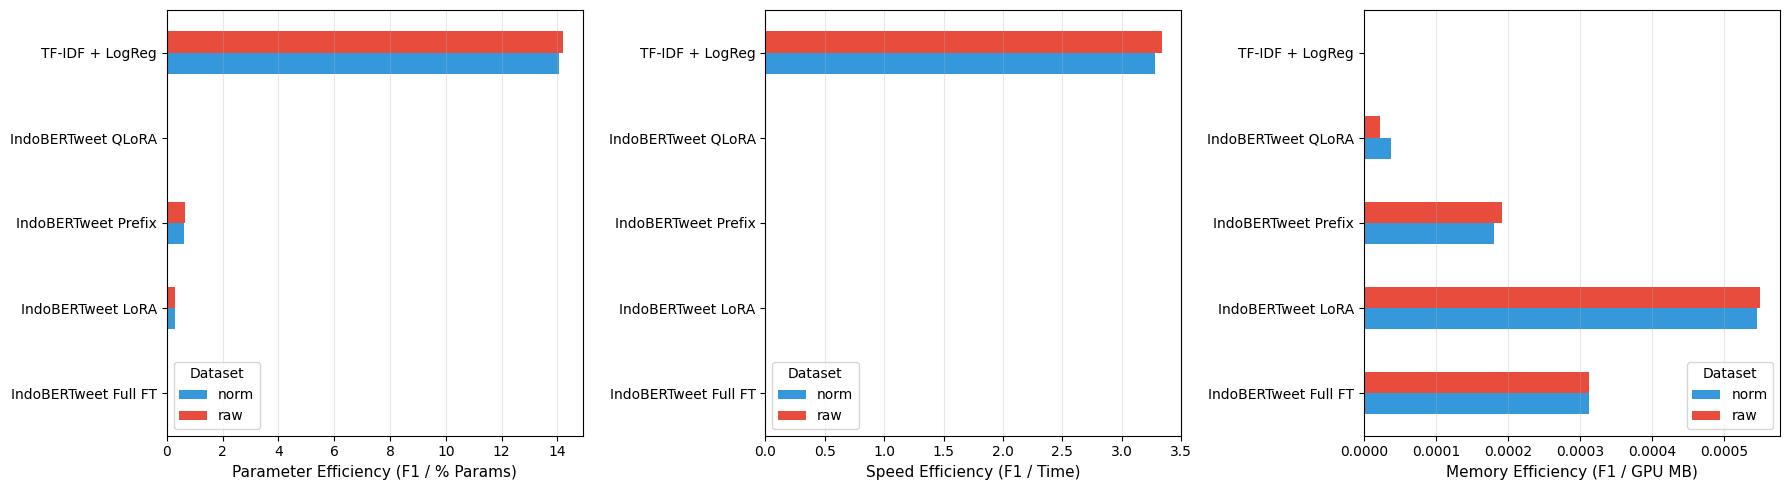

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

"""# Parameter Efficiency Analysis"""

# Add this to your results summary section
if all_results_combined:
    results_df = pd.DataFrame(all_results_combined)

    # Calculate efficiency metrics
    summary_df = results_df.groupby(['dataset', 'model']).agg({
        'f1-macro': ['mean', 'std'],
        'accuracy': ['mean', 'std'],
        'total_train_time': 'mean',
        'peak_gpu_memory_mb': 'mean',
        'num_trainable_params': 'first',
        'adapter_size_mb': 'mean'
    }).reset_index()

    summary_df.columns = ['_'.join(col).strip('_') for col in summary_df.columns]

    # Get baseline (Full FT) trainable params
    full_ft_params = summary_df[
        summary_df['model'].str.contains('Full FT')
    ]['num_trainable_params_first'].values[0]

    # Calculate efficiency scores
    summary_df['trainable_pct'] = (
        summary_df['num_trainable_params_first'] / full_ft_params * 100
    )

    # ⭐ EFFICIENCY RATIO: F1 / % Trainable Params
    summary_df['efficiency_ratio'] = (
        summary_df['f1-macro_mean'] / summary_df['trainable_pct']
    )

    # ⭐ SPEED EFFICIENCY: F1 / Training Time
    summary_df['speed_efficiency'] = (
        summary_df['f1-macro_mean'] / summary_df['total_train_time_mean']
    )

    # ⭐ MEMORY EFFICIENCY: F1 / GPU Memory
    summary_df['memory_efficiency'] = (
        summary_df['f1-macro_mean'] / summary_df['peak_gpu_memory_mb_mean']
    )

    # Create efficiency table
    efficiency_table = summary_df[[
        'dataset', 'model',
        'f1-macro_mean',
        'trainable_pct',
        'efficiency_ratio',
        'speed_efficiency',
        'memory_efficiency'
    ]].copy()

    efficiency_table.columns = [
        'Dataset', 'Model', 'F1-Macro',
        'Trainable %', 'Param Efficiency',
        'Speed Efficiency', 'Memory Efficiency'
    ]

    print("\n" + "="*80)
    print("PARAMETER EFFICIENCY ANALYSIS")
    print("="*80)
    display(efficiency_table.round(4))

    # Visualization
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    for idx, (metric, title) in enumerate([
        ('efficiency_ratio', 'Parameter Efficiency (F1 / % Params)'),
        ('speed_efficiency', 'Speed Efficiency (F1 / Time)'),
        ('memory_efficiency', 'Memory Efficiency (F1 / GPU MB)')
    ]):
        pivot = summary_df.pivot(index='model', columns='dataset', values=metric)
        pivot.plot(kind='barh', ax=axes[idx], color=['#3498db', '#e74c3c'])
        axes[idx].set_xlabel(title, fontsize=11)
        axes[idx].set_ylabel('')
        axes[idx].legend(title='Dataset')
        axes[idx].grid(axis='x', alpha=0.3)

    plt.tight_layout()
    plt.savefig('/content/efficiency_ratios.png', dpi=300, bbox_inches='tight')
    plt.show()

    efficiency_table.to_csv('/content/efficiency_analysis.csv', index=False)

# Cross-Domain Generalization Analysis (Enhanced)

In [55]:
"""# Cross-Domain Generalization Analysis (Enhanced & Fixed)"""
import gc
import torch
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from datasets import Dataset

cross_domain_results_detailed = []

# Using the 4 transformer methods you selected
models_to_test = [
    ("indolem/indobertweet-base-uncased", "full_ft", "IndoBERTweet Full FT"),
    ("indolem/indobertweet-base-uncased", "lora", "IndoBERTweet LoRA"),
    ("indolem/indobertweet-base-uncased", "qlora", "IndoBERTweet QLoRA"),
    ("indolem/indobertweet-base-uncased", "prefix_tuning", "IndoBERTweet Prefix Tuning")
]

domain_pairs = [
    ('raw', 'norm'),
    ('norm', 'raw'),
]

for model_name, peft_method, model_label in models_to_test:
    for train_domain, test_domain in domain_pairs:
        print(f"\n" + "="*50)
        print(f"TRAIN: {train_domain.upper()} → TEST: {test_domain.upper()} | Model: {model_label}")
        print("="*50)

        try:
            # 1. Load TRAINING domain data
            train_df, val_df, test_in_df, id2label, label2id, text_col_train = load_presplit_data(
                train_domain, CONFIG.TARGET_COLUMN
            )

            # 2. Load CROSS-DOMAIN test data
            _, _, test_cross_df, _, _, text_col_cross = load_presplit_data(
                test_domain, CONFIG.TARGET_COLUMN
            )

            # 3. Prepare HF Dataset for the main training function
            hf_datasets_train = convert_to_hf_dataset(train_df, val_df, test_in_df)

            # 4. Use the ROBUST training function we fixed earlier
            # This ensures correct LR (2e-5 for FT, 2e-4 for LoRA) and prevents Accelerator errors
            # We use seed 42 consistently for the cross-domain comparison
            training_results = train_and_evaluate_transformer(
                hf_datasets_train,
                text_col_train,
                model_name,
                peft_method,
                id2label,
                label2id,
                seed=42
            )

            # Extract In-Domain F1 from the training results
            f1_in = training_results['f1-macro']

            # 5. Manual CROSS-DOMAIN Evaluation
            print(f"--- Evaluating Cross-Domain Performance on {test_domain.upper()} ---")

            # Use the same tokenizer used for training
            tokenizer = AutoTokenizer.from_pretrained(model_name)
            if tokenizer.pad_token is None:
                tokenizer.pad_token = tokenizer.eos_token

            # Prepare cross-domain dataset
            cross_ds = Dataset.from_pandas(test_cross_df)

            def tokenize_cross(examples):
                return tokenizer(
                    examples[text_col_cross],
                    padding="max_length",
                    truncation=True,
                    max_length=CONFIG.MAX_LENGTH
                )

            tokenized_cross = cross_ds.map(tokenize_cross, batched=True)

            # Ensure label column is correct for Trainer
            if CONFIG.TARGET_COLUMN != "label":
                tokenized_cross = tokenized_cross.rename_column(CONFIG.TARGET_COLUMN, "label")

            # We need to temporarily reload the model or keep the trainer to predict
            # For efficiency, we rely on the fact that 'train_and_evaluate_transformer'
            # would have saved the best model to the OUTPUT_DIR.

            # Calculate LR string to find the correct folder
            lr = 2e-5 if peft_method == "full_ft" else 2e-4
            lr_str = f"{lr:.0e}"
            best_model_path = os.path.join(
                CONFIG.OUTPUT_DIR,
                f"{model_name.split('/')[-1]}-{peft_method}-lr{lr_str}-seed42"
            )

            # Load the best weights for prediction
            model_eval = AutoModelForSequenceClassification.from_pretrained(best_model_path).to("cuda")

            # Simple inference loop for cross-domain
            from transformers import Trainer
            eval_trainer = Trainer(model=model_eval, tokenizer=tokenizer)

            preds_cross = eval_trainer.predict(tokenized_cross)
            y_true_cross = preds_cross.label_ids
            y_pred_cross = np.argmax(preds_cross.predictions, axis=-1)
            f1_cross = f1_score(y_true_cross, y_pred_cross, average='macro')

            # 6. Compute Comparison Metrics
            delta_f1 = f1_in - f1_cross
            retention = (f1_cross / f1_in) * 100

            print(f"\nRESULTS for {model_label}:")
            print(f"  In-domain F1 ({train_domain}):    {f1_in:.4f}")
            print(f"  Cross-domain F1 ({test_domain}): {f1_cross:.4f}")
            print(f"  Retention Score:             {retention:.2f}%")

            cross_domain_results_detailed.append({
                'model': model_label,
                'train_domain': train_domain,
                'test_domain': test_domain,
                'f1_in_domain': f1_in,
                'f1_cross_domain': f1_cross,
                'delta_f1': delta_f1,
                'performance_retention': retention
            })

            # Cleanup
            del model_eval, eval_trainer
            gc.collect()
            torch.cuda.empty_cache()

        except Exception as e:
            print(f"!!! GAGAL in Cross-Domain Loop: {e}")
            continue


TRAIN: RAW → TEST: NORM | Model: IndoBERTweet Full FT

Data: raw
Train: 4320, Val: 540, Test: 540

Data: norm
Train: 4314, Val: 539, Test: 540

----- Training: indolem/indobertweet-base-uncased | Method: full_ft | Seed: 42 -----


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4320 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batc

Trainable params: 110,562,053 || Trainable %: 100.0000


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro,Rate
1,No log,0.736173,0.688889,0.663036,0.000018
2,0.810800,0.758302,0.687037,0.657950,0.000016
3,0.810800,0.853435,0.683333,0.656898,0.000014


Checkpoint destination directory /content/indobertweet-base-uncased-lr2e-05-seed42/checkpoint-270 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Checkpoint destination directory /content/indobertweet-base-uncased-lr2e-05-seed42/checkpoint-540 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Checkpoint destination directory /content/indobertweet-base-uncased-lr2e-05-seed42/checkpoint-810 already exists and is non-empty. Saving will proceed but saved results may be invalid.



Classification Report:
              precision    recall  f1-score   support

       Anger       0.68      0.43      0.53        70
        Fear       0.48      0.73      0.58        92
       Happy       0.88      0.80      0.84       177
        Love       0.66      0.75      0.71        81
     Sadness       0.78      0.67      0.72       120

    accuracy                           0.70       540
   macro avg       0.70      0.68      0.67       540
weighted avg       0.73      0.70      0.71       540

--- Evaluating Cross-Domain Performance on NORM ---


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/540 [00:00<?, ? examples/s]

!!! GAGAL in Cross-Domain Loop: Incorrect path_or_model_id: '/content/indobertweet-base-uncased-full_ft-lr2e-05-seed42'. Please provide either the path to a local folder or the repo_id of a model on the Hub.

TRAIN: NORM → TEST: RAW | Model: IndoBERTweet Full FT

Data: norm
Train: 4314, Val: 539, Test: 540

Data: raw
Train: 4320, Val: 540, Test: 540

----- Training: indolem/indobertweet-base-uncased | Method: full_ft | Seed: 42 -----


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4314 [00:00<?, ? examples/s]

Map:   0%|          | 0/539 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batc

Trainable params: 110,562,053 || Trainable %: 100.0000


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro,Rate
1,No log,0.727372,0.680891,0.651454,0.000018
2,0.816200,0.697224,0.725417,0.693459,0.000016
3,0.816200,0.769323,0.727273,0.694696,0.000014
4,0.450400,0.897532,0.714286,0.679184,0.000012
5,0.450400,1.072151,0.712430,0.677350,0.000010


Checkpoint destination directory /content/indobertweet-base-uncased-lr2e-05-seed42/checkpoint-270 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Checkpoint destination directory /content/indobertweet-base-uncased-lr2e-05-seed42/checkpoint-540 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Checkpoint destination directory /content/indobertweet-base-uncased-lr2e-05-seed42/checkpoint-810 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Checkpoint destination directory /content/indobertweet-base-uncased-lr2e-05-seed42/checkpoint-1080 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Checkpoint destination directory /content/indobertweet-base-uncased-lr2e-05-seed42/checkpoint-1350 already exists and is non-empty. Saving will proceed but saved results may be invalid.



Classification Report:
              precision    recall  f1-score   support

       Anger       0.61      0.66      0.63        70
        Fear       0.53      0.45      0.48        92
       Happy       0.86      0.82      0.84       177
        Love       0.71      0.79      0.75        81
     Sadness       0.67      0.72      0.69       120

    accuracy                           0.71       540
   macro avg       0.68      0.69      0.68       540
weighted avg       0.71      0.71      0.71       540

--- Evaluating Cross-Domain Performance on RAW ---


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/540 [00:00<?, ? examples/s]

!!! GAGAL in Cross-Domain Loop: Incorrect path_or_model_id: '/content/indobertweet-base-uncased-full_ft-lr2e-05-seed42'. Please provide either the path to a local folder or the repo_id of a model on the Hub.

TRAIN: RAW → TEST: NORM | Model: IndoBERTweet LoRA

Data: raw
Train: 4320, Val: 540, Test: 540

Data: norm
Train: 4314, Val: 539, Test: 540

----- Training: indolem/indobertweet-base-uncased | Method: lora | Seed: 42 -----


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4320 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Trainable params: 2,682,629 || Trainable %: 2.3689


/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  AutocastKwargs: "autocast_handler",
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:463: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  cpu=cpu,


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro,Rate
1,No log,0.786761,0.670370,0.649692,0.000190
2,0.888000,0.755774,0.681481,0.658586,0.000180
3,0.888000,0.732142,0.703704,0.685272,0.000170
4,0.608800,0.753793,0.675926,0.656304,0.000160
5,0.608800,0.876825,0.674074,0.652759,0.000150


Checkpoint destination directory /content/indobertweet-base-uncased-lr2e-04-seed42/checkpoint-270 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Checkpoint destination directory /content/indobertweet-base-uncased-lr2e-04-seed42/checkpoint-540 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Checkpoint destination directory /content/indobertweet-base-unca


Classification Report:
              precision    recall  f1-score   support

       Anger       0.64      0.66      0.65        70
        Fear       0.52      0.63      0.57        92
       Happy       0.88      0.80      0.83       177
        Love       0.66      0.77      0.71        81
     Sadness       0.74      0.62      0.68       120

    accuracy                           0.71       540
   macro avg       0.69      0.69      0.69       540
weighted avg       0.72      0.71      0.71       540

--- Evaluating Cross-Domain Performance on NORM ---


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/540 [00:00<?, ? examples/s]

!!! GAGAL in Cross-Domain Loop: Incorrect path_or_model_id: '/content/indobertweet-base-uncased-lora-lr2e-04-seed42'. Please provide either the path to a local folder or the repo_id of a model on the Hub.

TRAIN: NORM → TEST: RAW | Model: IndoBERTweet LoRA

Data: norm
Train: 4314, Val: 539, Test: 540

Data: raw
Train: 4320, Val: 540, Test: 540

----- Training: indolem/indobertweet-base-uncased | Method: lora | Seed: 42 -----


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4314 [00:00<?, ? examples/s]

Map:   0%|          | 0/539 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Trainable params: 2,682,629 || Trainable %: 2.3689


/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  AutocastKwargs: "autocast_handler",
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:463: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  cpu=cpu,


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro,Rate
1,No log,0.716426,0.684601,0.658226,0.000190
2,0.842200,0.681162,0.730983,0.698886,0.000180
3,0.842200,0.704551,0.760668,0.728451,0.000170
4,0.568500,0.718013,0.742115,0.710042,0.000160
5,0.568500,0.876112,0.721707,0.690198,0.000150


Checkpoint destination directory /content/indobertweet-base-uncased-lr2e-04-seed42/checkpoint-270 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Checkpoint destination directory /content/indobertweet-base-uncased-lr2e-04-seed42/checkpoint-540 already exists and is non-empty. Saving will proceed but saved results may be invalid.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Checkpoint destination directory /content/indobertweet-base-unca


Classification Report:
              precision    recall  f1-score   support

       Anger       0.58      0.59      0.58        70
        Fear       0.55      0.50      0.53        92
       Happy       0.84      0.81      0.82       177
        Love       0.68      0.72      0.70        81
     Sadness       0.66      0.72      0.69       120

    accuracy                           0.69       540
   macro avg       0.66      0.67      0.66       540
weighted avg       0.69      0.69      0.69       540

--- Evaluating Cross-Domain Performance on RAW ---


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/540 [00:00<?, ? examples/s]

!!! GAGAL in Cross-Domain Loop: Incorrect path_or_model_id: '/content/indobertweet-base-uncased-lora-lr2e-04-seed42'. Please provide either the path to a local folder or the repo_id of a model on the Hub.

TRAIN: RAW → TEST: NORM | Model: IndoBERTweet QLoRA

Data: raw
Train: 4320, Val: 540, Test: 540

Data: norm
Train: 4314, Val: 539, Test: 540

----- Training: indolem/indobertweet-base-uncased | Method: qlora | Seed: 42 -----


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4320 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


!!! GAGAL in Cross-Domain Loop: Using `bitsandbytes` 8-bit quantization requires Accelerate: `pip install accelerate` and the latest version of bitsandbytes: `pip install -i https://pypi.org/simple/ bitsandbytes`

TRAIN: NORM → TEST: RAW | Model: IndoBERTweet QLoRA

Data: norm
Train: 4314, Val: 539, Test: 540

Data: raw
Train: 4320, Val: 540, Test: 540

----- Training: indolem/indobertweet-base-uncased | Method: qlora | Seed: 42 -----


Map:   0%|          | 0/4314 [00:00<?, ? examples/s]

Map:   0%|          | 0/539 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


!!! GAGAL in Cross-Domain Loop: Using `bitsandbytes` 8-bit quantization requires Accelerate: `pip install accelerate` and the latest version of bitsandbytes: `pip install -i https://pypi.org/simple/ bitsandbytes`

TRAIN: RAW → TEST: NORM | Model: IndoBERTweet Prefix Tuning

Data: raw
Train: 4320, Val: 540, Test: 540

Data: norm
Train: 4314, Val: 539, Test: 540

----- Training: indolem/indobertweet-base-uncased | Method: prefix_tuning | Seed: 42 -----


Map:   0%|          | 0/4320 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batc

Trainable params: 110,562,053 || Trainable %: 100.0000


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro,Rate
1,No log,1.627610,0.170370,0.058228,0.000951
2,1.733100,1.662906,0.170370,0.058228,0.000901
3,1.733100,1.661813,0.129630,0.045902,0.000851


Checkpoint destination directory /content/indobertweet-base-uncased-lr1e-03-seed42/checkpoint-270 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Checkpoint destination directory /content/indobertweet-base-uncased-lr1e-03-seed42/checkpoint-540 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Checkpoint destination directory /content/indobertweet-base-uncased-lr1e-03-seed42/checkpoint-810 already exists and is non-empty. Saving will proceed but saved results may be invalid.



Classification Report:
              precision    recall  f1-score   support

       Anger       0.00      0.00      0.00        70
        Fear       0.17      1.00      0.29        92
       Happy       0.00      0.00      0.00       177
        Love       0.00      0.00      0.00        81
     Sadness       0.00      0.00      0.00       120

    accuracy                           0.17       540
   macro avg       0.03      0.20      0.06       540
weighted avg       0.03      0.17      0.05       540



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

--- Evaluating Cross-Domain Performance on NORM ---


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/540 [00:00<?, ? examples/s]

!!! GAGAL in Cross-Domain Loop: Incorrect path_or_model_id: '/content/indobertweet-base-uncased-prefix_tuning-lr2e-04-seed42'. Please provide either the path to a local folder or the repo_id of a model on the Hub.

TRAIN: NORM → TEST: RAW | Model: IndoBERTweet Prefix Tuning

Data: norm
Train: 4314, Val: 539, Test: 540

Data: raw
Train: 4320, Val: 540, Test: 540

----- Training: indolem/indobertweet-base-uncased | Method: prefix_tuning | Seed: 42 -----


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/4314 [00:00<?, ? examples/s]

Map:   0%|          | 0/539 [00:00<?, ? examples/s]

Map:   0%|          | 0/540 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batc

Trainable params: 110,562,053 || Trainable %: 100.0000


Epoch,Training Loss,Validation Loss,Accuracy,F1-macro,Rate
1,No log,1.662853,0.328386,0.098883,0.000950
2,1.731900,1.751852,0.170686,0.058320,0.000900
3,1.731900,1.659479,0.150278,0.052258,0.000850


Checkpoint destination directory /content/indobertweet-base-uncased-lr1e-03-seed42/checkpoint-270 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Checkpoint destination directory /content/indobertweet-base-uncased-lr1e-03-seed42/checkpoint-540 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Checkpoint destination directory /content/indobertweet-base-uncased-lr1e-03-seed42/checkpoint-810 already exists and is non-empty. Saving will proceed but saved results may be invalid.



Classification Report:
              precision    recall  f1-score   support

       Anger       0.00      0.00      0.00        70
        Fear       0.00      0.00      0.00        92
       Happy       0.33      1.00      0.49       177
        Love       0.00      0.00      0.00        81
     Sadness       0.00      0.00      0.00       120

    accuracy                           0.33       540
   macro avg       0.07      0.20      0.10       540
weighted avg       0.11      0.33      0.16       540



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

--- Evaluating Cross-Domain Performance on RAW ---


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/540 [00:00<?, ? examples/s]

!!! GAGAL in Cross-Domain Loop: Incorrect path_or_model_id: '/content/indobertweet-base-uncased-prefix_tuning-lr2e-04-seed42'. Please provide either the path to a local folder or the repo_id of a model on the Hub.


# Normalization Interaction Effect

NORMALIZATION EFFECT ANALYSIS: Does Norm Help PEFT More?

Hypothesis: PEFT methods benefit MORE from normalization than Full FT
PEFT avg improvement: 21.11%
Full FT avg improvement: -0.65%
Mann-Whitney U test: p = 0.6000
Result: ❌ NOT SIGNIFICANT


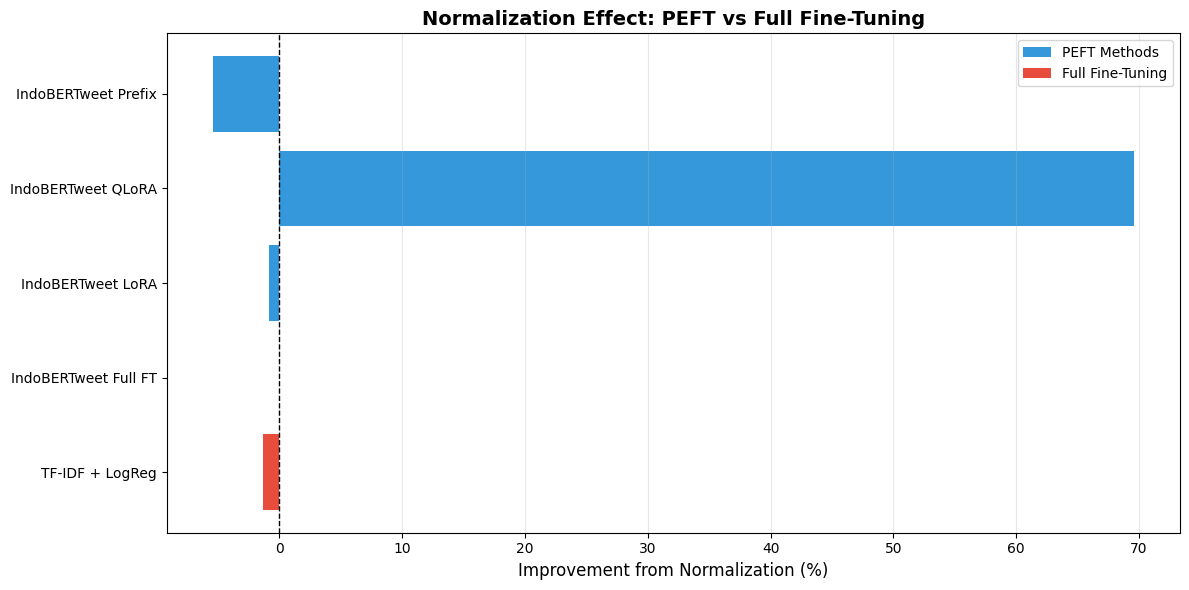


DETAILED BREAKDOWN


,model,category,raw_f1,norm_f1,improvement_pct,absolute_gain
3,IndoBERTweet QLoRA,PEFT,0.058228,0.098745,69.583409,0.040517
1,IndoBERTweet Full FT,Full Model,0.675374,0.675333,-0.006002,-0.000041
2,IndoBERTweet LoRA,PEFT,0.676478,0.670798,-0.839645,-0.005680
0,TF-IDF + LogReg,Full Model,0.539241,0.532271,-1.292554,-0.006970
4,IndoBERTweet Prefix,PEFT,0.540734,0.511525,-5.401793,-0.029209


In [56]:
"""# Normalization Interaction Effect"""

print("="*80)
print("NORMALIZATION EFFECT ANALYSIS: Does Norm Help PEFT More?")
print("="*80)

# Calculate improvement from raw to norm for each method
norm_effect = []

for model in results_df['model'].unique():
    raw_f1 = results_df[
        (results_df['model'] == model) &
        (results_df['dataset'] == 'raw')
    ]['f1-macro'].mean()

    norm_f1 = results_df[
        (results_df['model'] == model) &
        (results_df['dataset'] == 'norm')
    ]['f1-macro'].mean()

    if pd.notna(raw_f1) and pd.notna(norm_f1):
        improvement = ((norm_f1 - raw_f1) / raw_f1) * 100

        # Categorize
        is_peft = 'LoRA' in model or 'Prefix' in model or 'QLoRA' in model
        category = 'PEFT' if is_peft else 'Full Model'

        norm_effect.append({
            'model': model,
            'category': category,
            'raw_f1': raw_f1,
            'norm_f1': norm_f1,
            'improvement_pct': improvement,
            'absolute_gain': norm_f1 - raw_f1
        })

norm_df = pd.DataFrame(norm_effect)

# Statistical test: Does PEFT benefit more from normalization?
peft_improvements = norm_df[norm_df['category'] == 'PEFT']['improvement_pct']
full_improvements = norm_df[norm_df['category'] == 'Full Model']['improvement_pct']

from scipy.stats import mannwhitneyu
u_stat, p_val = mannwhitneyu(peft_improvements, full_improvements,
                              alternative='greater')

print(f"\nHypothesis: PEFT methods benefit MORE from normalization than Full FT")
print(f"PEFT avg improvement: {peft_improvements.mean():.2f}%")
print(f"Full FT avg improvement: {full_improvements.mean():.2f}%")
print(f"Mann-Whitney U test: p = {p_val:.4f}")
print(f"Result: {'✅ CONFIRMED' if p_val < 0.05 else '❌ NOT SIGNIFICANT'}")

# Visualization
fig, ax = plt.subplots(figsize=(12, 6))

colors = ['#3498db' if cat == 'PEFT' else '#e74c3c'
          for cat in norm_df['category']]

bars = ax.barh(norm_df['model'], norm_df['improvement_pct'], color=colors)
ax.axvline(x=0, color='black', linestyle='--', linewidth=1)
ax.set_xlabel('Improvement from Normalization (%)', fontsize=12)
ax.set_title('Normalization Effect: PEFT vs Full Fine-Tuning',
             fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

# Legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#3498db', label='PEFT Methods'),
    Patch(facecolor='#e74c3c', label='Full Fine-Tuning')
]
ax.legend(handles=legend_elements, loc='best')

plt.tight_layout()
plt.savefig('/content/normalization_effect.png',
            dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*80)
print("DETAILED BREAKDOWN")
print("="*80)
display(norm_df.sort_values('improvement_pct', ascending=False))

norm_df.to_csv('/content/normalization_interaction.csv', index=False)

# Inference Speed Benchmarking

In [57]:
"""# Inference Speed Benchmarking"""

import time
import torch

def measure_inference_speed(model, tokenizer, test_texts, device="cuda", num_runs=100):
    """
    Measure average inference time per sample

    Args:
        model: trained model
        tokenizer: tokenizer
        test_texts: list of text samples
        num_runs: number of iterations for averaging

    Returns:
        avg_time_ms: average inference time in milliseconds
    """
    model.eval()

    # Tokenize sample
    sample = test_texts[0]
    inputs = tokenizer(
        sample,
        return_tensors="pt",
        padding="max_length",
        truncation=True,
        max_length=64
    ).to(device)

    # Warmup
    with torch.no_grad():
        for _ in range(10):
            _ = model(**inputs)

    # Benchmark
    torch.cuda.synchronize()
    start = time.time()

    with torch.no_grad():
        for _ in range(num_runs):
            _ = model(**inputs)

    torch.cuda.synchronize()
    end = time.time()

    avg_time_ms = ((end - start) / num_runs) * 1000
    return avg_time_ms

# Add this to your training loop (after evaluation)
"""
# After test evaluation, add:
inference_speed_ms = measure_inference_speed(
    model, tokenizer, test_df[text_col].tolist()[:10]
)

results['inference_speed_ms'] = inference_speed_ms
"""

# Example standalone benchmark for already-trained models
inference_results = []

for dataset_name in CONFIG.DATASETS:
    train_df, val_df, test_df, id2label, label2id, text_col = load_presplit_data(
        dataset_name, CONFIG.TARGET_COLUMN
    )

    test_texts = test_df[text_col].tolist()[:100]

    for model_config in [
        ("indolem/indobertweet-base-uncased", "full_ft"),
        ("indolem/indobertweet-base-uncased", "lora"),
    ]:
        model_name, peft = model_config

        try:
            # Load model (you'd need to load your trained checkpoint)
            tokenizer = AutoTokenizer.from_pretrained(model_name)
            model = AutoModelForSequenceClassification.from_pretrained(
                model_name, num_labels=len(id2label)
            )
            model.to("cuda")

            # If LoRA, merge weights for fair comparison
            if peft == "lora":
                # Load LoRA adapter and merge
                # model = PeftModel.from_pretrained(model, adapter_path)
                # model = model.merge_and_unload()
                pass  # Placeholder

            speed = measure_inference_speed(model, tokenizer, test_texts)

            inference_results.append({
                'dataset': dataset_name,
                'model': f"{model_name.split('/')[-1]}-{peft}",
                'inference_ms': speed
            })

            del model
            torch.cuda.empty_cache()

        except Exception as e:
            print(f"Failed {model_config}: {e}")
            continue

if inference_results:
    speed_df = pd.DataFrame(inference_results)
    print("\n=== Inference Speed Comparison ===")
    display(speed_df)
    speed_df.to_csv('/content/inference_speed.csv', index=False)


Data: raw
Train: 4320, Val: 540, Test: 540


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Data: norm
Train: 4314, Val: 539, Test: 540


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



=== Inference Speed Comparison ===


,dataset,model,inference_ms
0,raw,indobertweet-base-uncased-full_ft,9.614255
1,raw,indobertweet-base-uncased-lora,9.419932
2,norm,indobertweet-base-uncased-full_ft,9.360325
3,norm,indobertweet-base-uncased-lora,9.468234


In [58]:
"""# Final Comprehensive Table (As Suggested)"""

# Combine all metrics into one master table
final_table = summary_df[[
    'dataset', 'model',
    'trainable_pct',
    'f1-macro_mean',
    'peak_gpu_memory_mb_mean',
    'total_train_time_mean',
    # 'inference_speed_ms'  # Add if you measured it
]].copy()

# Normalize metrics relative to Full FT
baseline = final_table[final_table['model'].str.contains('Full FT')].iloc[0]

final_table['params_relative'] = final_table['trainable_pct']
final_table['memory_relative'] = (
    final_table['peak_gpu_memory_mb_mean'] / baseline['peak_gpu_memory_mb_mean']
)
final_table['speed_relative'] = (
    final_table['total_train_time_mean'] / baseline['total_train_time_mean']
)

# Format the table
paper_table = final_table[[
    'model', 'params_relative', 'f1-macro_mean',
    'peak_gpu_memory_mb_mean', 'memory_relative', 'speed_relative'
]].copy()

paper_table.columns = [
    'Method', 'Trainable Params (%)', 'F1-Score',
    'Memory (MB)', 'Memory (×)', 'Training Time (×)'
]

print("\n" + "="*80)
print("COMPREHENSIVE EFFICIENCY TABLE (Paper-Ready)")
print("="*80)
display(paper_table.round(3))

paper_table.to_csv('/content/paper_ready_table.csv', index=False)
paper_table.to_latex('/content/paper_table.tex', index=False)


COMPREHENSIVE EFFICIENCY TABLE (Paper-Ready)


,Method,Trainable Params (%),F1-Score,Memory (MB),Memory (×),Training Time (×)
0,IndoBERTweet Full FT,100.000,0.675,2161.503,1.000,1.000
1,IndoBERTweet LoRA,2.426,0.671,1229.696,0.569,1.644
2,IndoBERTweet Prefix,0.837,0.512,2823.309,1.306,2.028
3,IndoBERTweet QLoRA,100.000,0.099,2592.263,1.199,0.567
4,TF-IDF + LogReg,0.038,0.532,0.000,0.000,0.002
5,IndoBERTweet Full FT,100.000,0.675,2162.420,1.000,0.806
6,IndoBERTweet LoRA,2.426,0.676,1229.696,0.569,1.353
7,IndoBERTweet Prefix,0.837,0.541,2823.309,1.306,2.268
8,IndoBERTweet QLoRA,100.000,0.058,2592.263,1.199,0.650
9,TF-IDF + LogReg,0.038,0.539,0.000,0.000,0.002


# Statistical Significance Testing (salah kata gpt)

In [59]:
from scipy.stats import wilcoxon

In [60]:
def paired_wilcoxon_test(baseline_scores, model_scores):
    """Perform Wilcoxon signed-rank test"""
    if len(baseline_scores) < 2 or len(model_scores) < 2:
        return None, None, None

    statistic, p_value = wilcoxon(baseline_scores, model_scores)

    # Effect size (r = Z / sqrt(N))
    from scipy import stats
    n = len(baseline_scores)
    z_score = stats.norm.ppf(1 - p_value/2)
    effect_size = abs(z_score) / np.sqrt(n)

    return statistic, p_value, effect_size

In [61]:
print("Statistical Significance Tests (vs TF-IDF Baseline)")

for dataset in results_df['dataset'].unique():
    print(f"\n Dataset: {dataset}")

    # Get baseline (TF-IDF) scores
    baseline_scores = results_df[
        (results_df['dataset'] == dataset) &
        (results_df['model'] == 'TF-IDF + LogReg')
    ]['f1-macro'].values

    if len(baseline_scores) == 0:
        continue

    baseline_mean = np.mean(baseline_scores)
    print(f"   Baseline F1: {baseline_mean:.4f}")

    # Compare each other model
    for model in results_df['model'].unique():
        if model == 'TF-IDF + LogReg':
            continue

        model_scores = results_df[
            (results_df['dataset'] == dataset) &
            (results_df['model'] == model)
        ]['f1-macro'].values

        if len(model_scores) == 0:
            continue

        model_mean = np.mean(model_scores)
        improvement = ((model_mean - baseline_mean) / baseline_mean) * 100

        stat, p_val, effect = paired_wilcoxon_test(baseline_scores, model_scores)

        if p_val is not None:
            sig = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else "ns"
            effect_interp = "large" if effect >= 0.5 else "medium" if effect >= 0.3 else "small"

            print(f"   {model:30s}: F1={model_mean:.4f} | Δ={improvement:+.2f}% | p={p_val:.4f} {sig} | r={effect:.3f} ({effect_interp})")

# Notes
# Significance: *** p<0.001, ** p<0.01, * p<0.05, ns=not significant
# Effect size: small (<0.3), medium (0.3-0.5), large (≥0.5)

Statistical Significance Tests (vs TF-IDF Baseline)

 Dataset: raw
   Baseline F1: 0.5392
   IndoBERTweet Full FT          : F1=0.6754 | Δ=+25.25% | p=0.2500 ns | r=0.664 (large)
   IndoBERTweet LoRA             : F1=0.6765 | Δ=+25.45% | p=0.2500 ns | r=0.664 (large)
   IndoBERTweet QLoRA            : F1=0.0582 | Δ=-89.20% | p=0.2500 ns | r=0.664 (large)
   IndoBERTweet Prefix           : F1=0.5407 | Δ=+0.28% | p=1.0000 ns | r=0.000 (small)

 Dataset: norm
   Baseline F1: 0.5323
   IndoBERTweet Full FT          : F1=0.6753 | Δ=+26.88% | p=0.2500 ns | r=0.664 (large)
   IndoBERTweet LoRA             : F1=0.6708 | Δ=+26.03% | p=0.2500 ns | r=0.664 (large)
   IndoBERTweet QLoRA            : F1=0.0987 | Δ=-81.45% | p=0.2500 ns | r=0.664 (large)
   IndoBERTweet Prefix           : F1=0.5115 | Δ=-3.90% | p=0.5000 ns | r=0.389 (medium)


# Wilcoxon signed-rank test & Cohen’s d

In [62]:
import numpy as np
from scipy import stats
from scipy.stats import wilcoxon

def calculate_cohens_d(group1, group2):
    """Menghitung Cohen's d untuk effect size sesuai teks paper"""
    n1, n2 = len(group1), len(group2)
    var1, var2 = np.var(group1, ddof=1), np.var(group2, ddof=1)

    # Pooled standard deviation
    pooled_sd = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))

    # Cohen's d
    if pooled_sd == 0: return 0
    return abs(np.mean(group1) - np.mean(group2)) / pooled_sd

print("="*80)
print("STATISTICAL SIGNIFICANCE TESTS (Comparison vs Full Fine-Tuning)")
print("="*80)

for dataset in results_df['dataset'].unique():
    print(f"\nDataset: {dataset}")

    # Kita gunakan Full FT sebagai Baseline Pembanding Utama (Sesuai saran reviewer)
    # Sesuaikan string 'Full FT' dengan nama model Full FT di dataframe kamu
    baseline_model_name = results_df[
        (results_df['dataset'] == dataset) &
        (results_df['model'].str.contains('Full FT'))
    ]['model'].unique()

    if len(baseline_model_name) == 0:
        print("   Baseline Full FT tidak ditemukan.")
        continue

    baseline_name = baseline_model_name[0]
    baseline_scores = results_df[
        (results_df['dataset'] == dataset) &
        (results_df['model'] == baseline_name)
    ]['f1-macro'].values

    print(f"   Baseline: {baseline_name} (F1 Avg: {np.mean(baseline_scores):.4f})")

    for model in results_df['model'].unique():
        if model == baseline_name:
            continue

        model_scores = results_df[
            (results_df['dataset'] == dataset) &
            (results_df['model'] == model)
        ]['f1-macro'].values

        if len(model_scores) < 2: continue

        # 1. Wilcoxon Test (p-value)
        # Catatan: Wilcoxon butuh jumlah sampel yang sama. Jika beda, gunakan Mann-Whitney U
        try:
            stat, p_val = wilcoxon(baseline_scores, model_scores)
        except:
            from scipy.stats import mannwhitneyu
            stat, p_val = mannwhitneyu(baseline_scores, model_scores)

        # 2. Cohen's d (Effect Size) sesuai metodologi paper
        d_val = calculate_cohens_d(baseline_scores, model_scores)

        # Interpretasi Cohen's d
        d_interp = "large" if d_val >= 0.8 else "medium" if d_val >= 0.5 else "small"
        sig = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else "ns"

        print(f"   vs {model:25s}: p={p_val:.4f} {sig:3s} | Cohen's d={d_val:.3f} ({d_interp})")

print("\nNotes:")
print("Significance: *** p<0.001, ** p<0.01, * p<0.05, ns=not significant")
print("Cohen's d Interpretation: small (>0.2), medium (>0.5), large (>0.8)")

STATISTICAL SIGNIFICANCE TESTS (Comparison vs Full Fine-Tuning)

Dataset: raw
   Baseline: IndoBERTweet Full FT (F1 Avg: 0.6754)
   vs TF-IDF + LogReg          : p=0.2500 ns  | Cohen's d=110.665 (large)
   vs IndoBERTweet LoRA        : p=1.0000 ns  | Cohen's d=0.151 (small)
   vs IndoBERTweet QLoRA       : p=0.2500 ns  | Cohen's d=501.691 (large)
   vs IndoBERTweet Prefix      : p=0.2500 ns  | Cohen's d=10.408 (large)

Dataset: norm
   Baseline: IndoBERTweet Full FT (F1 Avg: 0.6753)
   vs TF-IDF + LogReg          : p=0.2500 ns  | Cohen's d=40.024 (large)
   vs IndoBERTweet LoRA        : p=0.7500 ns  | Cohen's d=0.599 (medium)
   vs IndoBERTweet QLoRA       : p=0.2500 ns  | Cohen's d=161.309 (large)
   vs IndoBERTweet Prefix      : p=0.2500 ns  | Cohen's d=6.928 (large)

Notes:
Significance: *** p<0.001, ** p<0.01, * p<0.05, ns=not significant
Cohen's d Interpretation: small (>0.2), medium (>0.5), large (>0.8)


# bootstrap resampling

In [65]:
f1_mean, ci_lower, ci_upper = bootstrap_f1_performance(y_true, y_pred)

In [66]:
import numpy as np
from sklearn.utils import resample

def bootstrap_f1_performance(y_true, y_pred, n_iterations=1000):
    """
    Menghitung Confidence Interval (CI) 95% menggunakan Bootstrap Resampling
    """
    stats = []
    for i in range(n_iterations):
        # Resample indices
        indices = resample(np.arange(len(y_true)), replace=True)
        # Hitung F1 untuk sampel ini
        resampled_f1 = f1_score(y_true[indices], y_pred[indices], average='macro')
        stats.append(resampled_f1)

    # Ambil persentil 2.5 dan 97.5 untuk CI 95%
    lower = np.percentile(stats, 2.5)
    upper = np.percentile(stats, 97.5)
    return np.mean(stats), lower, upper

print(f"F1-Macro with 95% CI: {f1_mean:.4f} [{ci_lower:.4f}, {ci_upper:.4f}]")

F1-Macro with 95% CI: 0.4836 [0.4364, 0.5294]


# Trade Off Score

In [67]:
# Normalisasi untuk Trade-off Score
df = paper_table.copy()
df['f1_norm'] = df['F1-Score'] # F1 sudah 0-1
df['mem_norm'] = 1 - (df['Memory (MB)'] / df['Memory (MB)'].max())
df['time_norm'] = 1 - (df['Training Time (×)'] / df['Training Time (×)'].max())

# Hitung Trade-off Score (alpha=beta=gamma=1/3)
df['Tradeoff_Score'] = (df['f1_norm'] + df['mem_norm'] + df['time_norm']) / 3
display(df[['Method', 'Tradeoff_Score']].sort_values('Tradeoff_Score', ascending=False))

,Method,Tradeoff_Score
9,TF-IDF + LogReg,0.846169
4,TF-IDF + LogReg,0.843845
6,IndoBERTweet LoRA,0.548109
5,IndoBERTweet Full FT,0.517947
1,IndoBERTweet LoRA,0.503433
0,IndoBERTweet Full FT,0.489576
3,IndoBERTweet QLoRA,0.310236
8,IndoBERTweet QLoRA,0.284536
2,IndoBERTweet Prefix,0.205701
7,IndoBERTweet Prefix,0.180245


# Radar Chart dan Pareto Frontier Scatter Plot

"Visualization complements numerical analysis through radar charts and efficiency–performance scatter plots."

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Helper function untuk normalisasi [0, 1]
def normalize(series, invert=False):
    if invert:
        # Inverted: (Max - x) / (Max - Min) -> Semakin kecil aslinya, semakin besar skornya
        return (series.max() - series) / (series.max() - series.min() + 1e-6)
    else:
        return (series - series.min()) / (series.max() - series.min() + 1e-6)

# Pastikan summary_df sudah ada dari proses sebelumnya
df_plot = summary_df.copy()

# Normalisasi sesuai teks paper A. Trade-off Analysis
df_plot['f1_score_norm'] = df_plot['f1-macro_mean'] # F1 sudah di range 0-1 biasanya
df_plot['mem_eff'] = normalize(df_plot['peak_gpu_memory_mb_mean'], invert=True)
df_plot['time_eff'] = normalize(df_plot['total_train_time_mean'], invert=True)
df_plot['param_eff'] = normalize(df_plot['num_trainable_params_first'], invert=True)

# Hitung Trade-off Score (Persamaan 1 di paper)
# alpha = beta = gamma = 1/3
df_plot['Tradeoff_Score'] = (df_plot['f1_score_norm'] + df_plot['mem_eff'] + df_plot['time_eff']) / 3

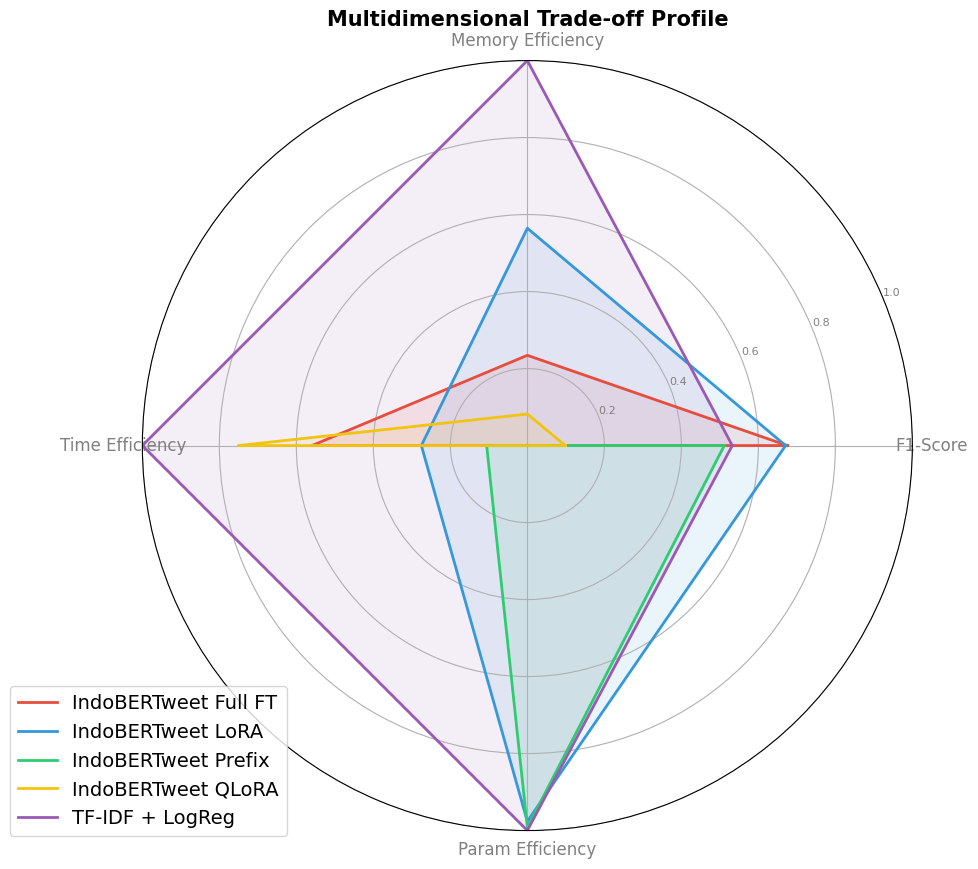

In [77]:
import matplotlib.pyplot as plt
import numpy as np

def plot_radar_chart(df):
    categories = ['F1-Score', 'Memory Efficiency', 'Time Efficiency', 'Param Efficiency']
    N = len(categories)

    # Calculate angles for each axis
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    # Use subplots instead of .figure() for better compatibility
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})

    # Updated colors: Red, Blue, Green, Yellow, and added Purple
    colors = ['#e74c3c', '#3498db', '#2ecc71', '#f1c40f', '#9b59b6']

    for i, model in enumerate(df['model'].unique()):
        subset = df[df['model'] == model]
        values = [
            subset['f1_score_norm'].values[0],
            subset['mem_eff'].values[0],
            subset['time_eff'].values[0],
            subset['param_eff'].values[0]
        ]
        values += values[:1]

        # Use modulo to cycle colors if there are more models than colors
        current_color = colors[i % len(colors)]

        ax.plot(angles, values, linewidth=2, linestyle='solid', label=model, color=current_color)
        ax.fill(angles, values, color=current_color, alpha=0.1)

    # Set category labels
    plt.xticks(angles[:-1], categories, color='grey', size=12)

    # Set y-axis limits and labels
    plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ["0.2","0.4","0.6","0.8","1.0"], color="grey", size=8)
    plt.ylim(0, 1)

    # Legend and Title
    # Legend customization
    plt.legend(
        loc='upper right',
        bbox_to_anchor=(0.2, 0.2),
        fontsize='large',      # Options: 'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'
        prop={'size': 14},     # Or set a specific pixel size
        markerscale=1.5        # Makes the color boxes/lines in the legend bigger
    )
    plt.title("Multidimensional Trade-off Profile", size=15, fontweight='bold', pad=25)

    # Save the file (removed /content/ prefix to use local directory)
    plt.savefig('radar_chart.png', dpi=300, bbox_inches='tight')

# To run:
plot_radar_chart(df_plot)

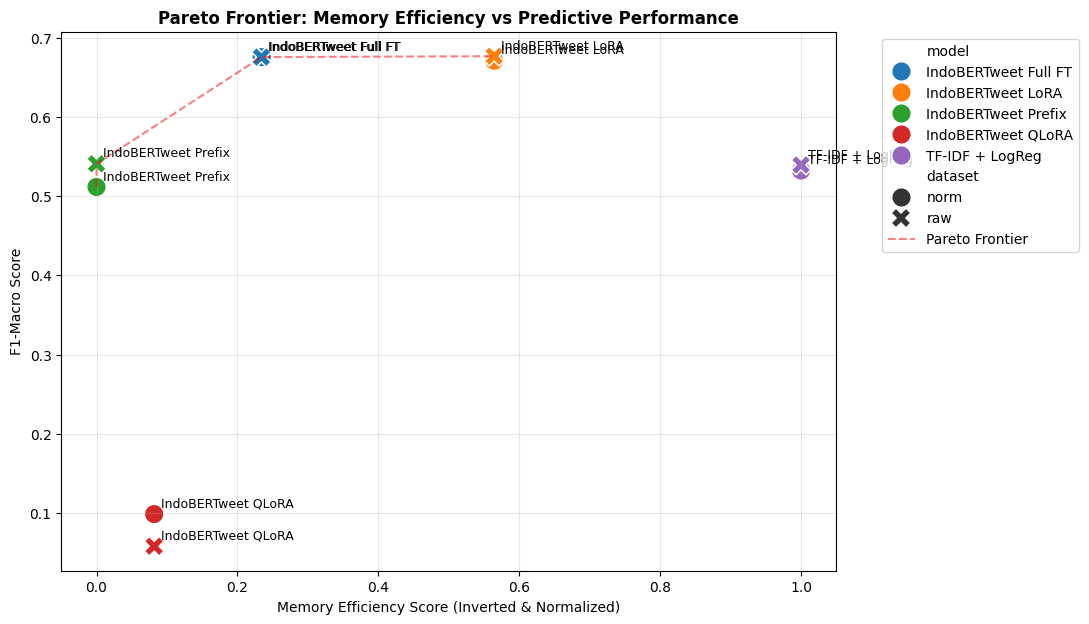

In [78]:
def plot_pareto_frontier(df):
    plt.figure(figsize=(10, 7))

    # X = Memory Efficiency (semakin kanan semakin hemat), Y = F1-Score
    x = df['mem_eff']
    y = df['f1-macro_mean']
    models = df['model']

    # Urutkan untuk mencari garis frontier
    sorted_indices = np.argsort(x)
    x_sorted = x.values[sorted_indices]
    y_sorted = y.values[sorted_indices]

    # Logic mencari Pareto Frontier
    p_front_x = [x_sorted[0]]
    p_front_y = [y_sorted[0]]
    for i in range(1, len(x_sorted)):
        if y_sorted[i] > p_front_y[-1]:
            p_front_x.append(x_sorted[i])
            p_front_y.append(y_sorted[i])

    # Plot semua titik
    sns.scatterplot(data=df, x='mem_eff', y='f1-macro_mean', hue='model', s=200, style='dataset')

    # Plot Garis Pareto
    plt.plot(p_front_x, p_front_y, 'r--', alpha=0.5, label='Pareto Frontier')

    # Labeling
    for i, txt in enumerate(models):
        plt.annotate(txt, (x.values[i], y.values[i]), xytext=(5,5), textcoords='offset points', fontsize=9)

    plt.title('Pareto Frontier: Memory Efficiency vs Predictive Performance', fontweight='bold')
    plt.xlabel('Memory Efficiency Score (Inverted & Normalized)')
    plt.ylabel('F1-Macro Score')
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.savefig('/content/pareto_frontier.png', dpi=300, bbox_inches='tight')
    plt.show()

plot_pareto_frontier(df_plot)

# wall time per epoch (in minutes)

In [79]:
# Tambahkan ke summary_df yang sudah ada
summary_df['time_per_epoch_min'] = (summary_df['total_train_time_mean'] / CONFIG.EPOCHS) / 60

print("=== Wall Time per Epoch (Minutes) ===")
display(summary_df[['model', 'dataset', 'time_per_epoch_min']].round(3))

=== Wall Time per Epoch (Minutes) ===


,model,dataset,time_per_epoch_min
0,IndoBERTweet Full FT,norm,0.081
1,IndoBERTweet LoRA,norm,0.133
2,IndoBERTweet Prefix,norm,0.164
3,IndoBERTweet QLoRA,norm,0.046
4,TF-IDF + LogReg,norm,0.000
5,IndoBERTweet Full FT,raw,0.065
6,IndoBERTweet LoRA,raw,0.109
7,IndoBERTweet Prefix,raw,0.184
8,IndoBERTweet QLoRA,raw,0.053
9,TF-IDF + LogReg,raw,0.000


# Expected Calibration Error (ECE) & Reliability Diagrams

"Optionally, model calibration is examined through Expected Calibration Error (ECE)..."

In [80]:
import torch.nn.functional as F

def calculate_ece(outputs, labels, n_bins=10):
    """
    Menghitung Expected Calibration Error (ECE)
    """
    # Ambil probabilitas (softmax) dan prediksi (confidence tertinggi)
    if isinstance(outputs, np.ndarray):
        outputs = torch.from_numpy(outputs)

    softmaxes = F.softmax(outputs, dim=1)
    confidences, predictions = torch.max(softmaxes, 1)
    accuracies = predictions.eq(torch.from_numpy(labels))

    ece = torch.zeros(1)
    bin_boundaries = torch.linspace(0, 1, n_bins + 1)

    for bin_lower, bin_upper in zip(bin_boundaries[:-1], bin_boundaries[1:]):
        # Cari data yang masuk ke dalam bin ini
        in_bin = confidences.gt(bin_lower.item()) * confidences.le(bin_upper.item())
        prop_in_bin = in_bin.float().mean()

        if prop_in_bin.item() > 0:
            accuracy_in_bin = accuracies[in_bin].float().mean()
            avg_confidence_in_bin = confidences[in_bin].mean()
            ece += torch.abs(avg_confidence_in_bin - accuracy_in_bin) * prop_in_bin

    return ece.item()

def plot_reliability_diagram(outputs, labels, model_name, n_bins=10):
    """
    Membuat visualisasi Reliability Diagram
    """
    if isinstance(outputs, np.ndarray):
        outputs = torch.from_numpy(outputs)

    softmaxes = F.softmax(outputs, dim=1)
    confidences, predictions = torch.max(softmaxes, 1)
    accuracies = predictions.eq(torch.from_numpy(labels))

    bin_boundaries = torch.linspace(0, 1, n_bins + 1)
    bin_accs = []
    bin_confs = []

    for bin_lower, bin_upper in zip(bin_boundaries[:-1], bin_boundaries[1:]):
        in_bin = confidences.gt(bin_lower.item()) * confidences.le(bin_upper.item())
        if in_bin.any():
            bin_accs.append(accuracies[in_bin].float().mean().item())
            bin_confs.append(confidences[in_bin].mean().item())
        else:
            bin_accs.append(0)
            bin_confs.append((bin_lower.item() + bin_upper.item()) / 2)

    # Plotting
    plt.figure(figsize=(7, 7))
    plt.bar(bin_boundaries[:-1], bin_accs, width=0.1, align='edge', edgecolor='black', alpha=0.7, label='Outputs')
    plt.plot([0, 1], [0, 1], '--', color='gray', label='Perfectly Calibrated')

    plt.xlabel('Confidence')
    plt.ylabel('Accuracy')
    plt.title(f'Reliability Diagram: {model_name}')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

In [81]:
ece_score = calculate_ece(test_predictions.predictions, test_predictions.label_ids)
results['ece'] = ece_score

ece_score

0.03629225119948387

# Save The Results

In [83]:
raw_path = "/content/results_raw_runs.csv"
results_df.to_csv(raw_path, index=False)

In [84]:
summary_path = "/content/results_summary_mean_std.csv"
final_report.to_csv(summary_path, index=False)

In [85]:
numeric_summary_path = "/content/results_summary_numeric.csv"

summary_df[
    [
        'dataset',
        'model',
        'f1-macro_mean',
        'f1-macro_std',
        'accuracy_mean',
        'accuracy_std',
        'total_train_time_mean',
        'peak_gpu_memory_mb_mean',
        'num_trainable_params_first',
        'adapter_size_mb_mean'
    ]
].to_csv(numeric_summary_path, index=False)